In [ ]:
# import libraries

# For data manipulation
import pandas as pd
import numpy as np

# For model training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.model_selection as ms
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import pydotplus
%matplotlib inline

# For Google Colab integration
import os
from google.colab import drive



from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
# import data as dataframe
file_path = '/content/drive/MyDrive/Spring25/BusinessDataAnalytics/Group Project/songs_utf.csv'
df = pd.read_csv(file_path)

# calling head() method
df.head()

artist                    song  song_name_len  duration_ms  \
0  Britney Spears  Oops!...I Did It Again           22.0     211160.0   
1       blink-182    All The Small Things           20.0     167066.0   
2      Faith Hill                 Breathe            7.0     250546.0   
3        Bon Jovi            It's My Life           12.0     224493.0   
4          *NSYNC             Bye Bye Bye           11.0     200560.0   

  explicit    year  popularity  hot  danceability  energy  ...  valence  \
0    False  2000.0        77.0  1.0         0.751   0.834  ...    0.894   
1    False  1999.0        79.0  1.0         0.434   0.897  ...    0.684   
2    False  1999.0        66.0  0.0         0.529   0.496  ...    0.278   
3    False  2000.0        78.0  1.0         0.551   0.913  ...    0.544   
4    False  2000.0        65.0  0.0         0.614   0.928  ...    0.879   

     tempo         genre  pop  rock  hiphop  dance  folk  rnb latin  
0   95.053           pop  1.0   0.0     0.0    0.0   0.0  0.0   0.0  
1  148.726     rock, pop  1.0   1.0     0.0    0.0   0.0  0.0   0.0  
2  136.859  pop, country  1.0   0.0     0.0    0.0   0.0  0.0   0.0  
3  119.992   rock, metal  0.0   1.0     0.0    0.0   0.0  0.0   0.0  
4  172.656           pop  1.0   0.0     0.0    0.0   0.0  0.0   0.0  

[5 rows x 27 columns]

### EDA

In [ ]:
df.describe()

song_name_len    duration_ms         year   popularity          hot  \
count    1500.000000    1500.000000  1500.000000  1500.000000  1500.000000   
mean       17.552667  234667.923333  2007.034000    59.414000     0.128000   
std        11.541289   38723.131986     4.567722    19.346045     0.334201   
min         2.000000  127920.000000  1998.000000     0.000000     0.000000   
25%         9.000000  209116.500000  2003.000000    56.000000     0.000000   
50%        14.000000  228973.000000  2007.000000    64.000000     0.000000   
75%        23.000000  254086.000000  2011.000000    71.000000     0.000000   
max        75.000000  484146.000000  2020.000000    89.000000     1.000000   

       danceability       energy          key     loudness         mode  ...  \
count   1500.000000  1500.000000  1500.000000  1500.000000  1500.000000  ...   
mean       0.659393     0.737019     5.365333    -5.434571     0.562000  ...   
std        0.142157     0.151874     3.587447     1.915075     0.496307  ...   
min        0.129000     0.054900     0.000000   -20.514000     0.000000  ...   
25%        0.568000     0.645750     2.000000    -6.452500     0.000000  ...   
50%        0.670000     0.754000     6.000000    -5.179000     1.000000  ...   
75%        0.758000     0.857250     8.000000    -4.142500     1.000000  ...   
max        0.975000     0.999000    11.000000    -0.276000     1.000000  ...   

          liveness      valence        tempo          pop         rock  \
count  1500.000000  1500.000000  1500.000000  1500.000000  1500.000000   
mean      0.187266     0.573458   119.884948     0.823333     0.134000   
std       0.146814     0.221088    26.762101     0.381514     0.340766   
min       0.023400     0.038100    60.019000     0.000000     0.000000   
25%       0.086200     0.411000    98.551250     1.000000     0.000000   
50%       0.129000     0.584000   120.092500     1.000000     0.000000   
75%       0.256000     0.755250   133.126250     1.000000     0.000000   
max       0.853000     0.973000   210.851000     1.000000     1.000000   

            hiphop        dance         folk          rnb        latin  
count  1500.000000  1500.000000  1500.000000  1500.000000  1500.000000  
mean      0.385333     0.158000     0.010667     0.264667     0.025333  
std       0.486836     0.364863     0.102762     0.441303     0.157188  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       1.000000     0.000000     0.000000     1.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 23 columns]

In [ ]:
df.columns

Index(['artist', 'song', 'song_name_len', 'duration_ms', 'explicit', 'year',
       'popularity', 'hot', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'genre', 'pop', 'rock', 'hiphop', 'dance', 'folk',
       'rnb', 'latin'],
      dtype='object')

In [ ]:
# df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            1500 non-null   object 
 1   song              1500 non-null   object 
 2   song_name_len     1500 non-null   float64
 3   duration_ms       1500 non-null   float64
 4   explicit          1500 non-null   object 
 5   year              1500 non-null   float64
 6   popularity        1500 non-null   float64
 7   hot               1500 non-null   float64
 8   danceability      1500 non-null   float64
 9   energy            1500 non-null   float64
 10  key               1500 non-null   float64
 11  loudness          1500 non-null   float64
 12  mode              1500 non-null   float64
 13  speechiness       1500 non-null   float64
 14  acousticness      1500 non-null   float64
 15  instrumentalness  1500 non-null   float64
 16  liveness          1500 non-null   float64


### Handling Missing values

In [ ]:
display(df.isnull().sum())

artist              499
song                499
song_name_len       499
duration_ms         499
explicit            499
year                499
popularity          499
hot                 499
danceability        499
energy              499
key                 499
loudness            499
mode                499
speechiness         499
acousticness        499
instrumentalness    499
liveness            499
valence             499
tempo               499
genre               499
pop                 499
rock                499
hiphop              499
dance               499
folk                499
rnb                 499
latin               499
dtype: int64

In [ ]:
df = df.dropna() ##drop missing value

In [ ]:
display(df.isna().sum()) ##recheck missing value again

artist              0
song                0
song_name_len       0
duration_ms         0
explicit            0
year                0
popularity          0
hot                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
pop                 0
rock                0
hiphop              0
dance               0
folk                0
rnb                 0
latin               0
dtype: int64

### Creating the Target Variable

In [ ]:
# Create binary target variable
df['popular_bin'] = (df['popularity'] >= 65).astype(int)

In [ ]:
# Sort the dataframe by popularity in descending order
top_songs = df.sort_values(by='popularity', ascending=False)

# Select relevant columns for display (customize as needed)
top_10_songs = top_songs[['artist', 'song', 'popularity', 'year']].head(10)

# Display the top 10 songs
print(top_10_songs)

import plotly.express as px

# Sort and select top 10 songs
top_10_songs = df.sort_values(by='popularity', ascending=False).head(10)

# Create a column that combines artist and song title for cleaner labels
top_10_songs['title'] = top_10_songs['artist'] + ' – ' + top_10_songs['song']

# Create horizontal bar chart
fig = px.bar(top_10_songs,
             x='popularity',
             y='title',
             orientation='h',
             title='Top 10 Most Popular Songs on Spotify (1998–2020)',
             labels={'popularity': 'Popularity Score', 'title': 'Song'},
             height=500)

fig.update_layout(yaxis={'categoryorder': 'total ascending'})  # Highest at the top
fig.show()

                 artist                                      song  popularity  \
1322  The Neighbourhood                           Sweater Weather        89.0   
1311          Tom Odell                              Another Love        88.0   
201              Eminem                                Without Me        87.0   
6                Eminem                       The Real Slim Shady        86.0   
1304         Bruno Mars                      Locked out of Heaven        85.0   
209              Eminem                          'Till I Collapse        85.0   
1227         Bruno Mars                      Locked out of Heaven        85.0   
1344     Arctic Monkeys                          Do I Wanna Know?        84.0   
1326     Arctic Monkeys  Why'd You Only Call Me When You're High?        84.0   
1408        John Legend                                 All of Me        84.0   

        year  
1322  2013.0  
1311  2013.0  
201   2002.0  
6     2000.0  
1304  2012.0  
209   2002.0  
122

### Identifying the Numerical and Categorical Variables

In [ ]:
# Numeric Variables
numeric_variables = [col for col in df.columns if df[col].dtype != "object" and col not in "popular_bin"] ##exclude our target variable
numeric_variables

['song_name_len',
 'duration_ms',
 'year',
 'popularity',
 'hot',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'rock',
 'hiphop',
 'dance',
 'folk',
 'rnb',
 'latin']

In [ ]:
categorical_variables = [col for col in df.columns if df[col].dtype == "O" and col != "popular_bin"]  ###exclude our target
categorical_variables

['artist', 'song', 'explicit', 'genre']

### VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_numeric = df[numeric_variables]

vif_data = pd.DataFrame()
vif_data['Feature'] = df_numeric.columns
vif_data['VIF'] = [variance_inflation_factor(df_numeric.values, i) for i in range(df_numeric.shape[1])]

# STEP 5: Sort and view
vif_data = vif_data.sort_values(by='VIF', ascending=False)
print(vif_data)

             Feature         VIF
2               year  223.222243
6             energy   58.492980
1        duration_ms   41.762405
5       danceability   37.997708
15             tempo   23.253306
8           loudness   15.978637
3         popularity   12.838612
14           valence   12.171495
0      song_name_len    3.496663
7                key    3.349479
13          liveness    2.803407
10       speechiness    2.758927
9               mode    2.398277
17            hiphop    2.377259
11      acousticness    1.987384
20               rnb    1.702072
16              rock    1.515738
18             dance    1.476506
4                hot    1.400768
12  instrumentalness    1.116333
21             latin    1.074161
19              folk    1.040424


###drop popularity, hot as it is similar to the target variable

In [ ]:
df_numeric = df_numeric.drop(columns=['popularity', 'hot'])

vif_data = pd.DataFrame()
vif_data['Feature'] = df_numeric.columns
vif_data['VIF'] = [variance_inflation_factor(df_numeric.values, i) for i in range(df_numeric.shape[1])]

# STEP 5: Sort and view
vif_data = vif_data.sort_values(by='VIF', ascending=False)
print(vif_data)

             Feature         VIF
2               year  215.191887
4             energy   58.443871
1        duration_ms   41.478762
3       danceability   37.993047
13             tempo   23.077882
6           loudness   15.872195
12           valence   12.155685
0      song_name_len    3.489084
5                key    3.331284
11          liveness    2.801831
8        speechiness    2.757035
7               mode    2.392429
15            hiphop    2.365007
9       acousticness    1.983010
18               rnb    1.672014
14              rock    1.498523
16             dance    1.457720
10  instrumentalness    1.114070
19             latin    1.070015
17              folk    1.040051


In [ ]:
#drop year

df_numeric = df_numeric.drop(columns=['year'])
vif_data = pd.DataFrame()
vif_data['Feature'] = df_numeric.columns
vif_data['VIF'] = [variance_inflation_factor(df_numeric.values, i) for i in range(df_numeric.shape[1])]

# STEP 5: Sort and view
vif_data = vif_data.sort_values(by='VIF', ascending=False)
print(vif_data)

             Feature        VIF
1        duration_ms  33.163808
3             energy  32.948945
2       danceability  29.903625
12             tempo  20.518327
11           valence  12.053327
5           loudness  11.672708
0      song_name_len   3.469978
4                key   3.297769
10          liveness   2.769386
7        speechiness   2.751866
14            hiphop   2.363381
6               mode   2.342643
8       acousticness   1.810773
17               rnb   1.646179
13              rock   1.486172
15             dance   1.457689
9   instrumentalness   1.101455
18             latin   1.067703
16              folk   1.039831


In [ ]:
df_numeric.columns

Index(['song_name_len', 'duration_ms', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'rock', 'hiphop', 'dance', 'folk',
       'rnb', 'latin'],
      dtype='object')

In [ ]:
df_test = df[['explicit','song_name_len', 'duration_ms', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'rock', 'hiphop', 'dance', 'folk',
       'rnb', 'latin', 'popular_bin' ]]

### Encoding 'explicit'

In [ ]:
## encoding explicit
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df_test['explicit'] = label_encoder.fit_transform(df_test['explicit'])
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))


#prints out what we encoded for married
print("Explicit Encoding:")
print(mapping)

Explicit Encoding:
{False: np.int64(0), True: np.int64(1)}


<ipython-input-18-c5a13feca627>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_test['explicit'].value_counts()

explicit
0    1134
1     366
Name: count, dtype: int64

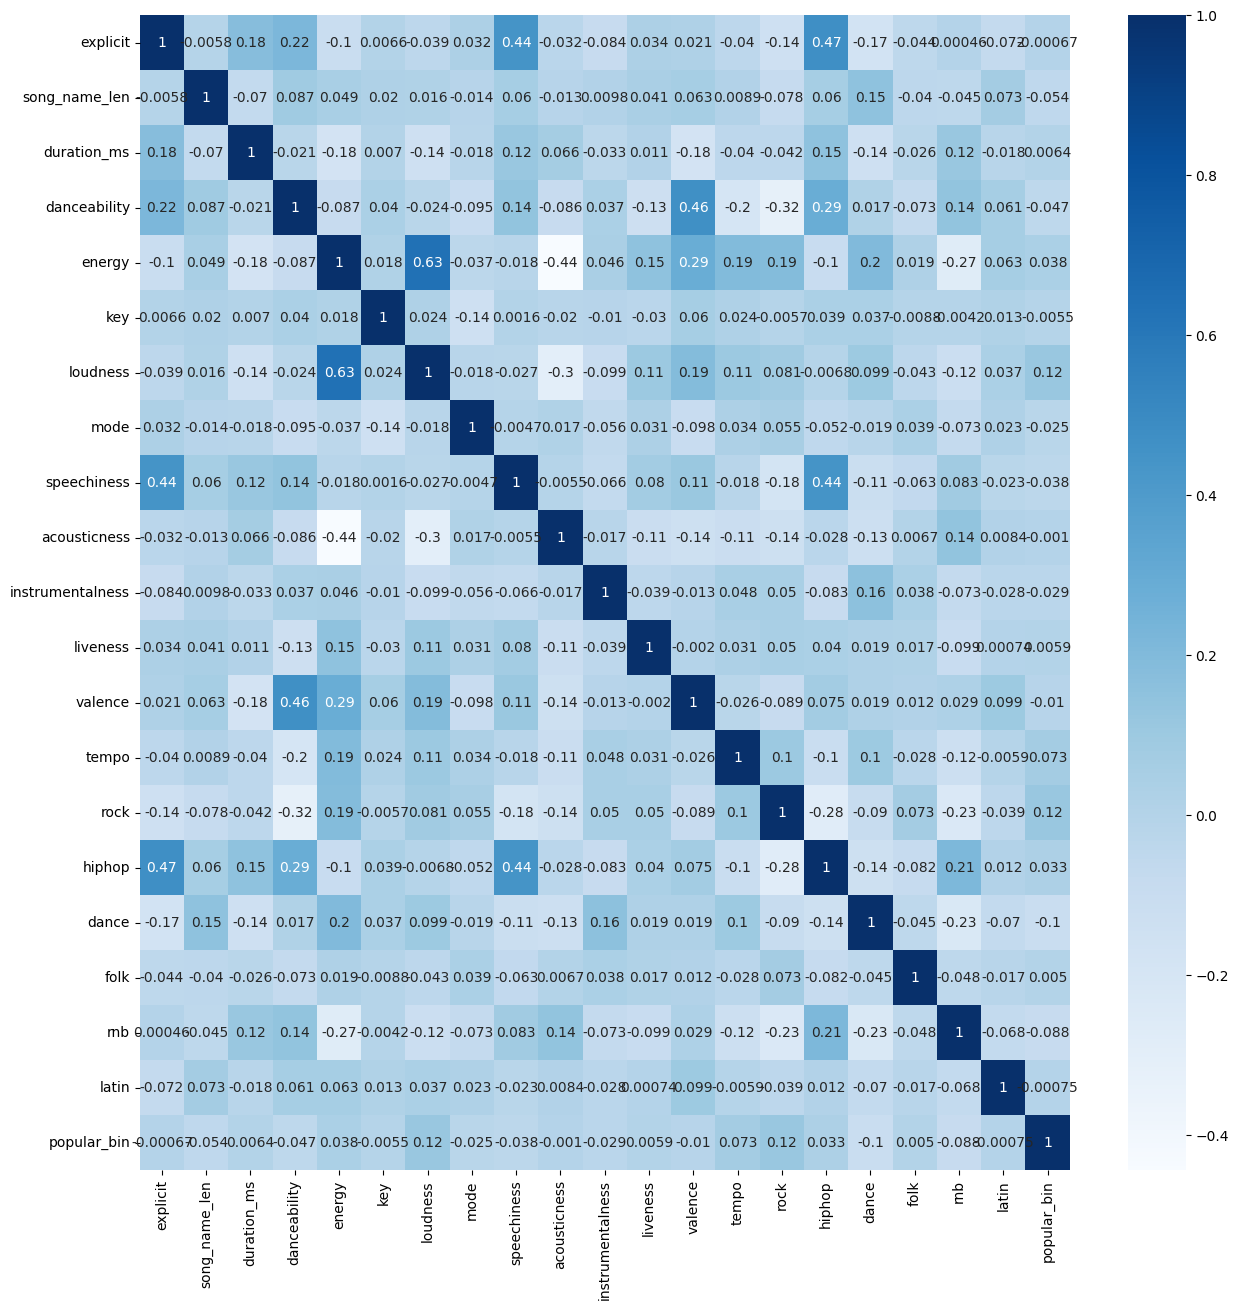

In [ ]:
corr_matrix = df_test.corr()
plt.figure(figsize=(15,15)) ###change the figure size here
sns.heatmap(corr_matrix, cmap='Blues', annot=True)
plt.show()

In [ ]:
# Install mlxtend if not already installed
!pip install mlxtend

# Imports
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [ ]:
X = df_test.drop('popular_bin', axis=1)
y = df_test['popular_bin']

In [ ]:
# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Step 3: Initialize base model
logreg = LogisticRegression(max_iter=1000)

In [ ]:
# Step 4: Sequential Forward Selection
sfs = SFS(logreg,
          k_features='best',
          forward=True,
          floating=False,
          scoring='roc_auc',
          cv=5,          # 5-fold cross-validation
          n_jobs=-1)     # use all CPU cores

sfs = sfs.fit(X_train, y_train)

In [ ]:
# Step 5: Results
selected_features = list(sfs.k_feature_names_)
print("Best Feature Subset:", selected_features)
print("Cross-Validated AUC:", sfs.k_score_)


Best Feature Subset: ['explicit', 'song_name_len', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'tempo', 'rock', 'hiphop', 'dance', 'rnb']
Cross-Validated AUC: 0.6385529327244651


In [ ]:
# Step 6: Evaluate on Test Set
logreg.fit(X_train[selected_features], y_train)
y_pred_prob = logreg.predict_proba(X_test[selected_features])[:, 1]
test_auc = roc_auc_score(y_test, y_pred_prob)
print("Test AUC:", test_auc)

Test AUC: 0.603065696325527


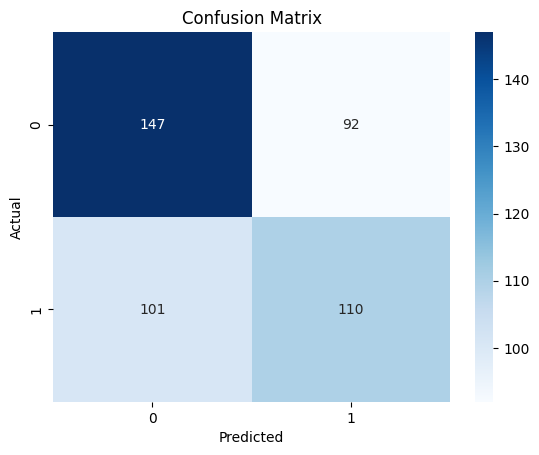

Classification Report:

              precision    recall  f1-score   support

           0       0.59      0.62      0.60       239
           1       0.54      0.52      0.53       211

    accuracy                           0.57       450
   macro avg       0.57      0.57      0.57       450
weighted avg       0.57      0.57      0.57       450



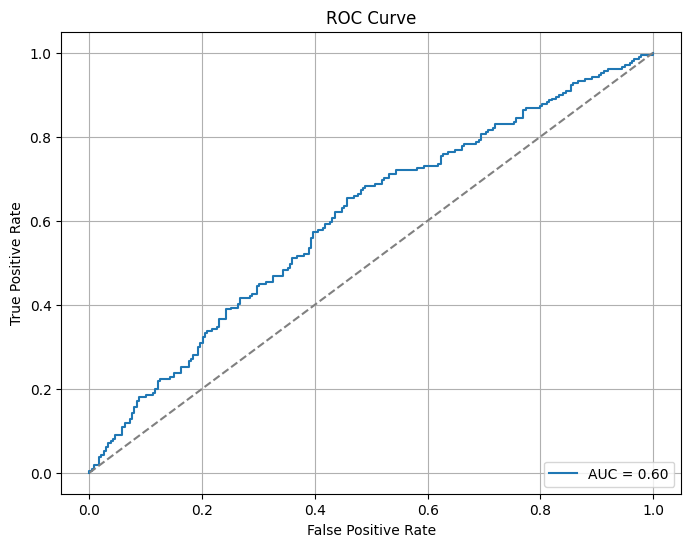

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions
y_pred = (y_pred_prob >= 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


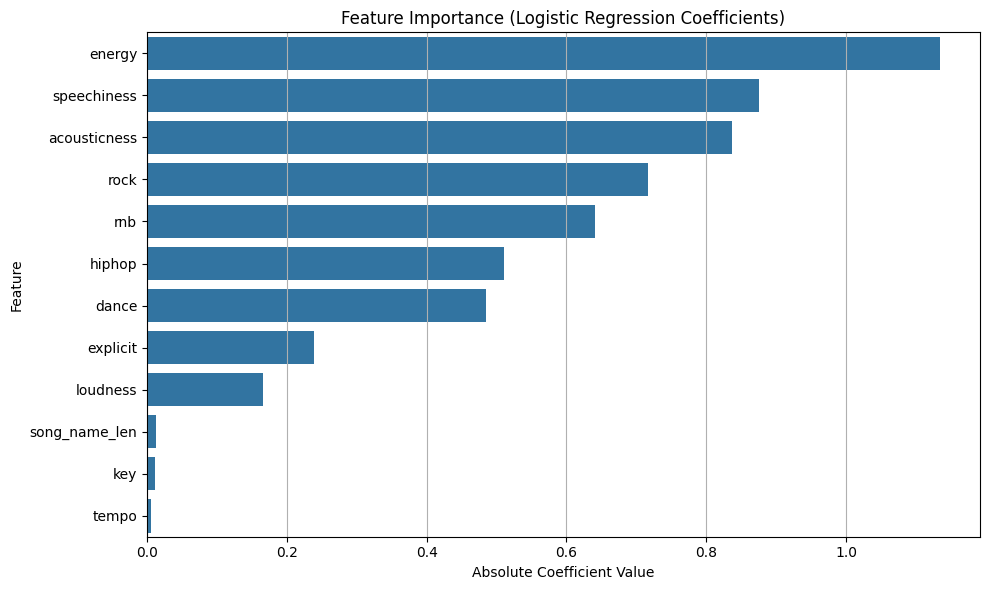

In [ ]:
# Feature Importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': logreg.coef_[0]
})

# Sort by absolute value of coefficients
feature_importance['Abs_Coeff'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coeff', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Abs_Coeff', y='Feature', data=feature_importance)
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.grid(axis='x')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


trying a different set of features

In [ ]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import pandas as pd

# Define candidate features (after VIF filtering)
candidate_features = [ 'explicit',         # Categorical (encoded), low VIF
    'song_name_len',    # Non-collinear, low impact but stable
    'speechiness',      # Important across models
    'acousticness',     # Shows moderate predictive power
    'instrumentalness', # Valid audio feature, low VIF
    'mode',             # Scale mode (major/minor)
    'key',              # Musical key
    'liveness',         # Live performance indicator
    'rock',             # Genre binary
    'hiphop',           # Genre binary
    'dance',            # Genre binary
    'rnb',              # Genre binary
    'folk',             # Genre binary
    'latin'             # Genre binary
    ]

# To store results
results = []

# Loop through all combinations of 3 to 7 features
for k in range(3, 8):  # You can change the range to test larger combinations
    for combo in combinations(candidate_features, k):
        try:
            model = LogisticRegression(max_iter=1000)
            model.fit(X_train[list(combo)], y_train)
            y_pred_prob = model.predict_proba(X_test[list(combo)])[:, 1]
            auc = roc_auc_score(y_test, y_pred_prob)
            results.append({
                'Features': combo,
                'AUC': auc
            })
        except Exception as e:
            print(f"Skipped combo {combo} due to error: {e}")

# Create DataFrame and sort by AUC
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='AUC', ascending=False).reset_index(drop=True)

# Display top 10 combinations
print("Top 10 Feature Combinations by AUC:")
print(results_df)


Top 10 Feature Combinations by AUC:
                                               Features       AUC
0                 (mode, key, rock, hiphop, dance, rnb)  0.590484
1                      (mode, rock, hiphop, dance, rnb)  0.590117
2          (mode, key, rock, hiphop, dance, rnb, latin)  0.590087
3           (mode, key, rock, hiphop, dance, rnb, folk)  0.589889
4                (mode, rock, hiphop, dance, rnb, folk)  0.589780
...                                                 ...       ...
9797  (explicit, acousticness, instrumentalness, key...  0.428087
9798  (explicit, acousticness, instrumentalness, key...  0.426977
9799  (explicit, acousticness, instrumentalness, mod...  0.426957
9800  (acousticness, instrumentalness, mode, key, li...  0.426362
9801  (explicit, acousticness, instrumentalness, mod...  0.424815

[9802 rows x 2 columns]


In [ ]:
results_df.head(10)

Features       AUC
0              (mode, key, rock, hiphop, dance, rnb)  0.590484
1                   (mode, rock, hiphop, dance, rnb)  0.590117
2       (mode, key, rock, hiphop, dance, rnb, latin)  0.590087
3        (mode, key, rock, hiphop, dance, rnb, folk)  0.589889
4             (mode, rock, hiphop, dance, rnb, folk)  0.589780
5            (mode, rock, hiphop, dance, rnb, latin)  0.589076
6      (mode, rock, hiphop, dance, rnb, folk, latin)  0.588798
7           (speechiness, mode, rock, hiphop, dance)  0.588659
8      (speechiness, mode, key, rock, hiphop, dance)  0.588431
9  (explicit, mode, rock, hiphop, dance, rnb, latin)  0.588223

In [ ]:
best_features1 = list(results_df.loc[0, 'Features'])
print("Best features to use:", best_features1)

Best features to use: ['mode', 'key', 'rock', 'hiphop', 'dance', 'rnb']


Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.61      0.59       239
           1       0.53      0.49      0.51       211

    accuracy                           0.55       450
   macro avg       0.55      0.55      0.55       450
weighted avg       0.55      0.55      0.55       450

AUC Score: 0.5904836502805926


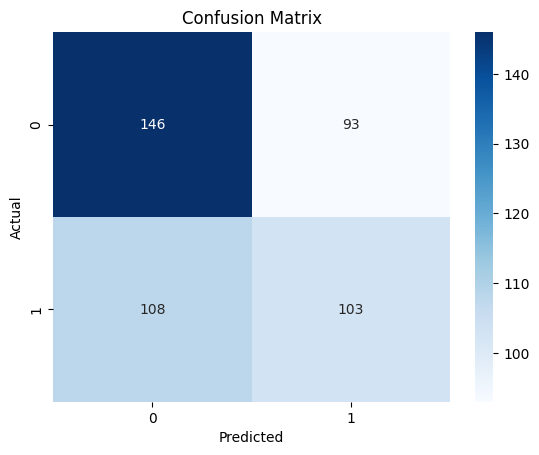

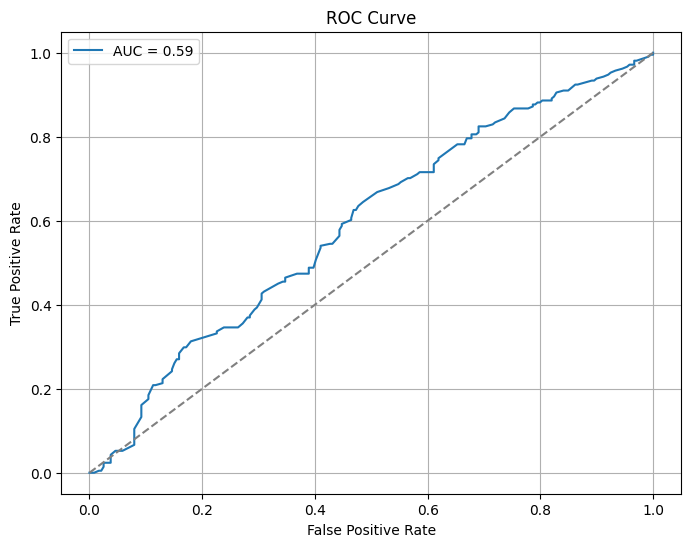

In [ ]:
# Train on best feature subset
final_model = LogisticRegression(max_iter=1000)
final_model.fit(X_train[best_features1], y_train)

# Predict on test set
y_pred_prob = final_model.predict_proba(X_test[best_features1])[:, 1]
y_pred = (y_pred_prob >= 0.5).astype(int)

# Evaluate performance
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_pred_prob))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_pred_prob):.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


<ipython-input-34-301a2cb175a1>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




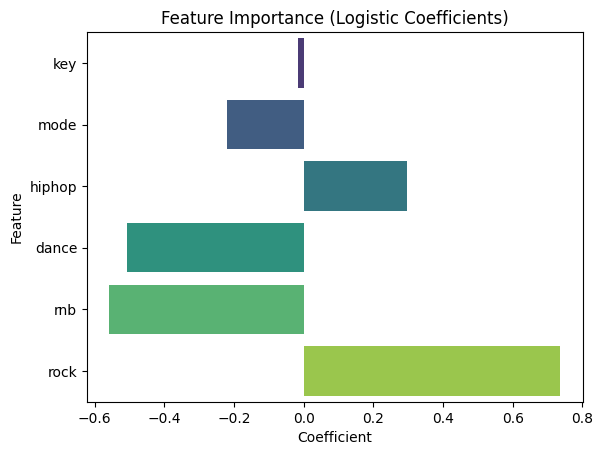

In [ ]:
feature_importance = pd.DataFrame({
    'Feature': best_features1,
    'Coefficient': final_model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=True)

sns.barplot(data=feature_importance, x='Coefficient', y='Feature', palette='viridis')
plt.title("Feature Importance (Logistic Coefficients)")
plt.show()


In [ ]:
# Binary target variable
df['popular_bin'] = (df['popularity'] >= 65).astype(int)

# Encode 'explicit'
le = LabelEncoder()
df['explicit'] = le.fit_transform(df['explicit'])

# Use selected important features
selected_features = ['danceability', 'energy', 'explicit', 'valence', 'rnb', 'rock', 'acousticness']
df_sub = df[selected_features + ['popular_bin']]



In [ ]:
# Step 2: Train-test split
X = df_sub.drop('popular_bin', axis=1)
y = df_sub['popular_bin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:

# Step 3: Model training
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}



In [ ]:
# Step 4: Evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred
    print(f"\n📊 Model: {name}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("ROC AUC Score:", round(roc_auc_score(y_test, y_prob), 3))


📊 Model: Logistic Regression
Confusion Matrix:
 [[183  56]
 [156  55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.77      0.63       239
           1       0.50      0.26      0.34       211

    accuracy                           0.53       450
   macro avg       0.52      0.51      0.49       450
weighted avg       0.52      0.53      0.50       450

ROC AUC Score: 0.522

📊 Model: K-Nearest Neighbors
Confusion Matrix:
 [[116 123]
 [ 95 116]]
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.49      0.52       239
           1       0.49      0.55      0.52       211

    accuracy                           0.52       450
   macro avg       0.52      0.52      0.52       450
weighted avg       0.52      0.52      0.52       450

ROC AUC Score: 0.517

📊 Model: Decision Tree
Confusion Matrix:
 [[130 109]
 [ 93 118]]
Classification Report:
               precisio

TRYING OTHERS

In [ ]:
# Encode 'explicit'
le = LabelEncoder()
df['explicit'] = le.fit_transform(df['explicit'])



In [ ]:
# Step 2: VIF filtering
numeric_vars = df.select_dtypes(include=np.number).drop(columns=['popularity', 'popular_bin', 'year', 'hot'])  # optional drops
vif = pd.DataFrame()
vif["Feature"] = numeric_vars.columns
vif["VIF"] = [variance_inflation_factor(numeric_vars.values, i) for i in range(numeric_vars.shape[1])]

# Retain features with VIF < 5
vif_filtered = vif[vif["VIF"] < 5]["Feature"].tolist()

# Add categorical and genre variables we care about
other_vars = ['explicit', 'rock', 'hiphop', 'dance', 'folk', 'rnb', 'latin']  # categorical and genres
final_features = list(set(vif_filtered + other_vars))



In [ ]:
final_features

['liveness',
 'dance',
 'mode',
 'speechiness',
 'instrumentalness',
 'hiphop',
 'explicit',
 'latin',
 'folk',
 'acousticness',
 'rock',
 'key',
 'song_name_len',
 'rnb']

In [ ]:
# Step 3: Decision Tree for Feature Importance
X_temp = df[final_features]
y_temp = df['popular_bin']
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_temp, y_temp)

# Get top 15 features by importance
feat_imp = pd.Series(tree_model.feature_importances_, index=final_features).sort_values(ascending=False)
selected_features = feat_imp.head(15).index.tolist()



In [ ]:
# Step 4: Modeling
X = df[selected_features]
y = df['popular_bin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}



In [ ]:
# Step 5: Evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred
    print(f"\n📊 Model: {name}")
    print("Top Features:", selected_features)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("ROC AUC Score:", round(roc_auc_score(y_test, y_prob), 3))


📊 Model: Logistic Regression
Top Features: ['liveness', 'acousticness', 'speechiness', 'song_name_len', 'instrumentalness', 'key', 'hiphop', 'mode', 'explicit', 'rock', 'rnb', 'dance', 'latin', 'folk']
Confusion Matrix:
 [[154  85]
 [118  93]]
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.64      0.60       239
           1       0.52      0.44      0.48       211

    accuracy                           0.55       450
   macro avg       0.54      0.54      0.54       450
weighted avg       0.55      0.55      0.54       450

ROC AUC Score: 0.555

📊 Model: K-Nearest Neighbors
Top Features: ['liveness', 'acousticness', 'speechiness', 'song_name_len', 'instrumentalness', 'key', 'hiphop', 'mode', 'explicit', 'rock', 'rnb', 'dance', 'latin', 'folk']
Confusion Matrix:
 [[137 102]
 [110 101]]
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.57      0.56       239
     

REMOVING EXPLICIT

In [ ]:
final_features1= ['song_name_len',
 'rnb',
 'key',
 'liveness',
 'latin',
 'hiphop',
 'folk',
 'mode',
 'speechiness',
 'rock',
 'dance',
 'instrumentalness',
 'acousticness']

In [ ]:
# Step 3: Decision Tree for Feature Importance
X_temp = df[final_features1]
y_temp = df['popular_bin']
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_temp, y_temp)

# Get top 15 features by importance
feat_imp = pd.Series(tree_model.feature_importances_, index=final_features1).sort_values(ascending=False)
selected_features = feat_imp.head(15).index.tolist()
# Step 4: Modeling
X = df[selected_features]
y = df['popular_bin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}
# Step 5: Evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred
    print(f"\n📊 Model: {name}")
    print("Top Features:", selected_features)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("ROC AUC Score:", round(roc_auc_score(y_test, y_prob), 3))




📊 Model: Logistic Regression
Top Features: ['speechiness', 'acousticness', 'liveness', 'song_name_len', 'instrumentalness', 'key', 'hiphop', 'mode', 'rock', 'rnb', 'dance', 'latin', 'folk']
Confusion Matrix:
 [[149  90]
 [120  91]]
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.62      0.59       239
           1       0.50      0.43      0.46       211

    accuracy                           0.53       450
   macro avg       0.53      0.53      0.53       450
weighted avg       0.53      0.53      0.53       450

ROC AUC Score: 0.554

📊 Model: K-Nearest Neighbors
Top Features: ['speechiness', 'acousticness', 'liveness', 'song_name_len', 'instrumentalness', 'key', 'hiphop', 'mode', 'rock', 'rnb', 'dance', 'latin', 'folk']
Confusion Matrix:
 [[135 104]
 [109 102]]
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.56      0.56       239
           1       0.50      

ADDING LOUDNESS

In [ ]:
final_features2= ['song_name_len',
 'rnb',
 'key',
 'liveness',
 'latin',
 'hiphop',
 'folk',
 'mode',
 'speechiness',
 'rock',
 'dance',
 'instrumentalness',
 'acousticness',
  'loudness']

In [ ]:
# Step 3: Decision Tree for Feature Importance
X_temp = df[final_features2]
y_temp = df['popular_bin']
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_temp, y_temp)

# Get top 15 features by importance
feat_imp = pd.Series(tree_model.feature_importances_, index=final_features2).sort_values(ascending=False)
selected_features = feat_imp.head(15).index.tolist()
# Step 4: Modeling
X = df[selected_features]
y = df['popular_bin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}
# Step 5: Evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred
    print(f"\n📊 Model: {name}")
    print("Top Features:", selected_features)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("ROC AUC Score:", round(roc_auc_score(y_test, y_prob), 3))




📊 Model: Logistic Regression
Top Features: ['acousticness', 'speechiness', 'liveness', 'loudness', 'song_name_len', 'key', 'instrumentalness', 'mode', 'hiphop', 'rnb', 'dance', 'rock', 'folk', 'latin']
Confusion Matrix:
 [[154  85]
 [108 103]]
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.64      0.61       239
           1       0.55      0.49      0.52       211

    accuracy                           0.57       450
   macro avg       0.57      0.57      0.57       450
weighted avg       0.57      0.57      0.57       450

ROC AUC Score: 0.582

📊 Model: K-Nearest Neighbors
Top Features: ['acousticness', 'speechiness', 'liveness', 'loudness', 'song_name_len', 'key', 'instrumentalness', 'mode', 'hiphop', 'rnb', 'dance', 'rock', 'folk', 'latin']
Confusion Matrix:
 [[144  95]
 [117  94]]
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.60      0.58       239
     

ADD VALENCE AND loudness

In [ ]:
final_features3= ['song_name_len',
 'rnb',
 'key',
 'liveness',
 'latin',
 'hiphop',
 'folk',
 'mode',
 'speechiness',
 'rock',
 'dance',
 'instrumentalness',
 'acousticness',
  'loudness',
  'valence']

In [ ]:
# Step 3: Decision Tree for Feature Importance
X_temp = df[final_features3]
y_temp = df['popular_bin']
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_temp, y_temp)

# Get top 15 features by importance
feat_imp = pd.Series(tree_model.feature_importances_, index=final_features3).sort_values(ascending=False)
selected_features = feat_imp.head(15).index.tolist()
# Step 4: Modeling
X = df[selected_features]
y = df['popular_bin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}
# Step 5: Evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred
    print(f"\n📊 Model: {name}")
    print("Top Features:", selected_features)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("ROC AUC Score:", round(roc_auc_score(y_test, y_prob), 3))




📊 Model: Logistic Regression
Top Features: ['acousticness', 'speechiness', 'liveness', 'loudness', 'valence', 'song_name_len', 'key', 'instrumentalness', 'mode', 'hiphop', 'dance', 'rnb', 'folk', 'rock', 'latin']
Confusion Matrix:
 [[152  87]
 [111 100]]
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.64      0.61       239
           1       0.53      0.47      0.50       211

    accuracy                           0.56       450
   macro avg       0.56      0.55      0.55       450
weighted avg       0.56      0.56      0.56       450

ROC AUC Score: 0.582

📊 Model: K-Nearest Neighbors
Top Features: ['acousticness', 'speechiness', 'liveness', 'loudness', 'valence', 'song_name_len', 'key', 'instrumentalness', 'mode', 'hiphop', 'dance', 'rnb', 'folk', 'rock', 'latin']
Confusion Matrix:
 [[143  96]
 [118  93]]
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.60    

##This is the best

In [ ]:
final_features4=['explicit', 'song_name_len', 'energy', 'loudness', 'speechiness', 'acousticness', 'tempo', 'rock', 'hiphop', 'dance', 'rnb']

In [ ]:
# Step 3: Decision Tree for Feature Importance
X_temp = df[final_features4]
y_temp = df['popular_bin']
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_temp, y_temp)

# Get top 15 features by importance
feat_imp = pd.Series(tree_model.feature_importances_, index=final_features4).sort_values(ascending=False)
selected_features = feat_imp.head(15).index.tolist()
# Step 4: Modeling
X = df[selected_features]
y = df['popular_bin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}
# Step 5: Evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred
    print(f"\n📊 Model: {name}")
    print("Top Features:", selected_features)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("ROC AUC Score:", round(roc_auc_score(y_test, y_prob), 3))




📊 Model: Logistic Regression
Top Features: ['loudness', 'speechiness', 'energy', 'tempo', 'acousticness', 'song_name_len', 'dance', 'hiphop', 'explicit', 'rock', 'rnb']
Confusion Matrix:
 [[151  88]
 [102 109]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.63      0.61       239
           1       0.55      0.52      0.53       211

    accuracy                           0.58       450
   macro avg       0.58      0.57      0.57       450
weighted avg       0.58      0.58      0.58       450

ROC AUC Score: 0.603

📊 Model: K-Nearest Neighbors
Top Features: ['loudness', 'speechiness', 'energy', 'tempo', 'acousticness', 'song_name_len', 'dance', 'hiphop', 'explicit', 'rock', 'rnb']
Confusion Matrix:
 [[126 113]
 [110 101]]
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.53      0.53       239
           1       0.47      0.48      0.48       211

    accuracy    

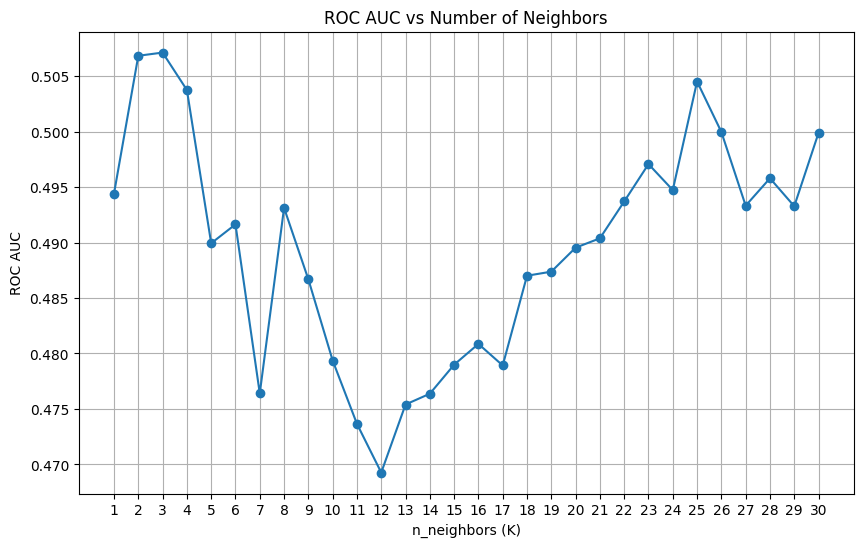

Best number of neighbors (K): 3


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# Try values of K from 1 to 30
k_values = range(1, 31)
auc_scores = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for AUC
    auc = roc_auc_score(y_test, y_prob)
    auc_scores.append(auc)

# Plot to visualize
plt.figure(figsize=(10, 6))
plt.plot(k_values, auc_scores, marker='o')
plt.title("ROC AUC vs Number of Neighbors")
plt.xlabel("n_neighbors (K)")
plt.ylabel("ROC AUC")
plt.grid(True)
plt.xticks(k_values)
plt.show()
best_k = k_values[auc_scores.index(max(auc_scores))]
print(f"Best number of neighbors (K): {best_k}")

##Model 1 - Logistic Regression

In [ ]:
# 📦 Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_predict
from yellowbrick.classifier import ClassificationReport
import statsmodels.api as sm

In [ ]:
# 🎯 Features and target
final_features4 = ['explicit', 'song_name_len', 'energy', 'loudness', 'speechiness', 'acousticness', 'tempo', 'rock', 'hiphop', 'dance', 'rnb']
X = df[final_features4]
y = df['popular_bin']
feature_names = X.columns.tolist()
class_names = ['Not Popular', 'Popular']

In [ ]:
# 🔄 Train-test split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)



In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# 🔎 Predict
y_pred = logistic_model.predict(X_test)

In [ ]:
evaluation_metrics = pd.DataFrame({
    "Evaluation Metric": ["Train Accuracy", "Test Accuracy", "Recall", "Precision", "F1 Score"],
    "Value": [
        logistic_model.score(X_train, y_train),
        accuracy_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ]
})

print("🔍 Logistic Regression Evaluation Metrics:")
display(evaluation_metrics)

🔍 Logistic Regression Evaluation Metrics:


Evaluation Metric     Value
0    Train Accuracy  0.623810
1     Test Accuracy  0.582222
2            Recall  0.526066
3         Precision  0.557789
4          F1 Score  0.541463

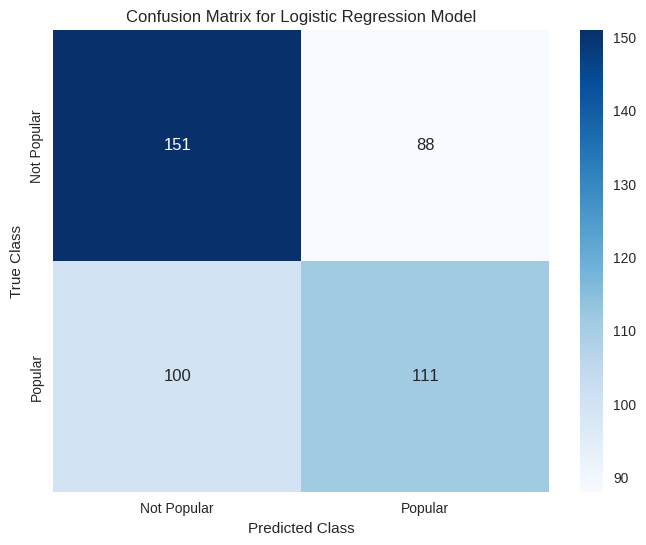

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

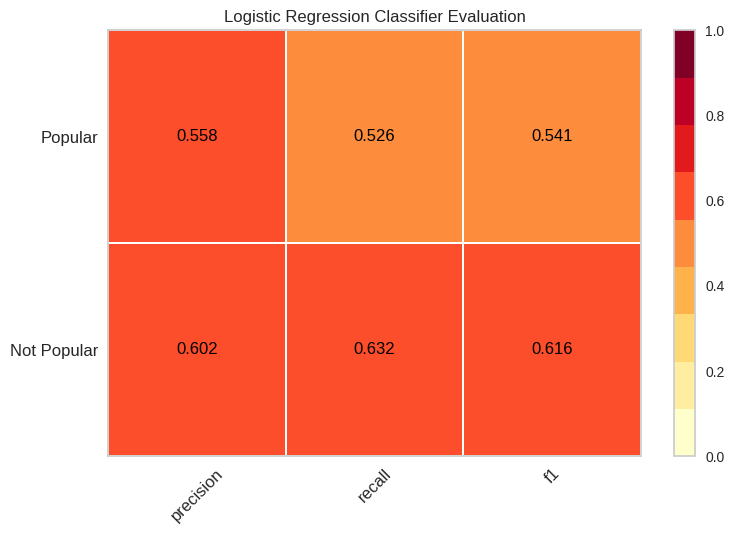

<Axes: title={'center': 'Logistic Regression Classifier Evaluation'}>

In [ ]:
#Yellowbrick classification report
visualizer = ClassificationReport(logistic_model, classes=class_names, support=False, title="Logistic Regression Classifier Evaluation")
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [ ]:
# 📈 Logistic Regression using StatsModels for p-values and Odds Ratios
X_train_sm = sm.add_constant(X_train)  # Add intercept term
model_sm = sm.Logit(y_train, X_train_sm)
results = model_sm.fit(method="newton")

print(results.summary2(xname=['Intercept'] + feature_names))

Optimization terminated successfully.
         Current function value: 0.654396
         Iterations 5
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: popular_bin      Pseudo R-squared: 0.055     
Date:               2025-04-29 23:33 AIC:              1398.2308 
No. Observations:   1050             BIC:              1457.7094 
Df Model:           11               Log-Likelihood:   -687.12   
Df Residuals:       1038             LL-Null:          -726.88   
Converged:          1.0000           LLR p-value:      1.8159e-12
No. Iterations:     5.0000           Scale:            1.0000    
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept         -0.0925   0.0645 -1.4352 0.1512 -0.2188  0.0338
explicit          -0.0973   0.0786 -1.2392 0.2153 -0.2513  0.0566


In [ ]:
# 🧠 Interpret coefficients
coefficients = logistic_model.coef_[0]
odds_ratios = np.exp(coefficients)
feature_impact = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios
}).sort_values(by='Odds Ratio', ascending=False)

display(feature_impact)

Feature  Coefficient  Odds Ratio
3        loudness     0.345129    1.412172
8          hiphop     0.270272    1.310321
7            rock     0.257260    1.293382
6           tempo     0.161393    1.175146
5    acousticness     0.151212    1.163244
0        explicit    -0.095849    0.908601
4     speechiness    -0.132994    0.875471
1   song_name_len    -0.148768    0.861769
9           dance    -0.180437    0.834905
2          energy    -0.218906    0.803397
10            rnb    -0.301320    0.739841

In [ ]:
# 🔁 10-fold cross-validation
model_cv = LogisticRegression()
y_pred_cross = cross_val_predict(model_cv, X_scaled, y, cv=10)

# Cross-validation metrics
evaluation_metrics_cv = pd.DataFrame({
    "Evaluation Metric": ["Accuracy", "Recall", "Precision", "F1 Score"],
    "Value": [
        accuracy_score(y, y_pred_cross),
        recall_score(y, y_pred_cross),
        precision_score(y, y_pred_cross),
        f1_score(y, y_pred_cross)
    ]
})

print("\n✅ Performance Metrics With Cross-Validation:")
display(evaluation_metrics_cv)

# Confusion matrix (CV)
matrix_cv = confusion_matrix(y, y_pred_cross)
print("\n📌 Confusion Matrix - Cross Validation:")
print(matrix_cv)

print("\n🔁 Logistic Regression Metrics without CV (Reprint):")
display(evaluation_metrics)

print("\n📌 Confusion Matrix - Without CV:")
print(conf_matrix)


✅ Performance Metrics With Cross-Validation:


Evaluation Metric     Value
0          Accuracy  0.590667
1            Recall  0.514006
2         Precision  0.578864
3          F1 Score  0.544510


📌 Confusion Matrix - Cross Validation:
[[519 267]
 [347 367]]

🔁 Logistic Regression Metrics without CV (Reprint):


Evaluation Metric     Value
0    Train Accuracy  0.623810
1     Test Accuracy  0.582222
2            Recall  0.526066
3         Precision  0.557789
4          F1 Score  0.541463


📌 Confusion Matrix - Without CV:
[[151  88]
 [100 111]]


##Model 2 - KNN

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from yellowbrick.classifier import ClassificationReport
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Define features and target
final_features4 = ['explicit', 'song_name_len', 'energy', 'loudness', 'speechiness', 'acousticness', 'tempo', 'rock', 'hiphop', 'dance', 'rnb']
X = df[final_features4]
y = df['popular_bin']
feature_names = X.columns.tolist()
class_names = ['Not Popular', 'Popular']

# Standardize
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [ ]:
# Base k-NN model
knn_model = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

🔍 k-NN Evaluation Metrics:


Evaluation Metric     Value
0    Train Accuracy  0.780000
1     Test Accuracy  0.584444
2            Recall  0.495614
3         Precision  0.610811
4          F1 Score  0.547215

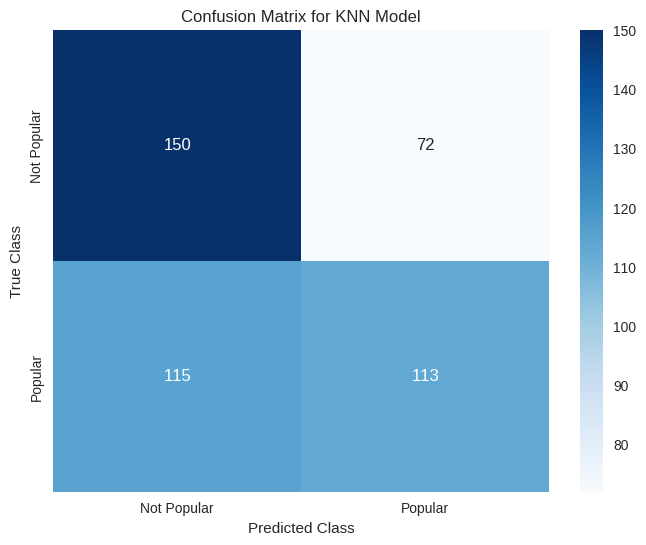

In [ ]:
# Evaluation metrics
evaluation_metrics = pd.DataFrame({
    "Evaluation Metric": ["Train Accuracy", "Test Accuracy", "Recall", "Precision", "F1 Score"],
    "Value": [
        knn_model.score(X_train, y_train),
        accuracy_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ]
})
print("🔍 k-NN Evaluation Metrics:")
display(evaluation_metrics)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.title('Confusion Matrix for KNN Model')
plt.show()

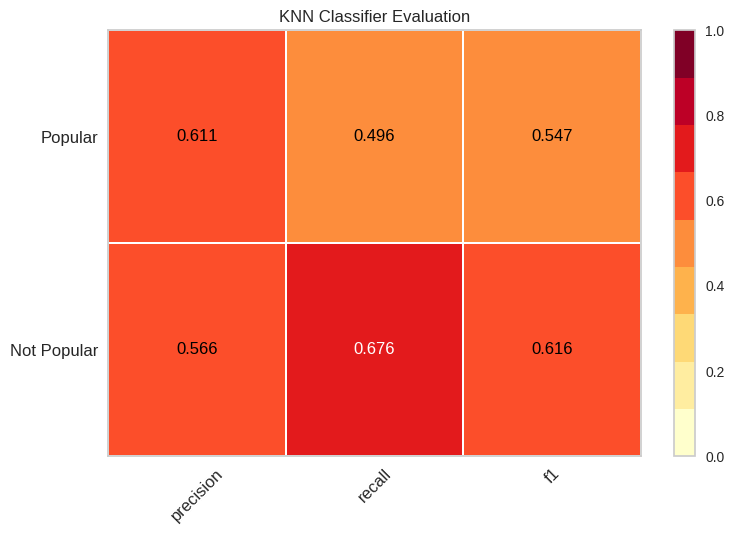

<Axes: title={'center': 'KNN Classifier Evaluation'}>

In [ ]:
# Yellowbrick classification report
visualizer = ClassificationReport(knn_model, classes=class_names, support=False, title="KNN Classifier Evaluation")
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [ ]:
# Cross-validation
CV_model = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
y_pred_cross = cross_val_predict(CV_model, X, y, cv=10)

accuracy_cv = accuracy_score(y, y_pred_cross)
recall_cv = recall_score(y, y_pred_cross)
precision_cv = precision_score(y, y_pred_cross)
f1_cv = f1_score(y, y_pred_cross)
matrix_cv = confusion_matrix(y, y_pred_cross)

evaluation_metrics_with_cv = pd.DataFrame({
    "Evaluation Metric_CV": ["Accuracy", "Recall", "Precision", "F1 Score"],
    "Value": [accuracy_cv, recall_cv, precision_cv, f1_cv]
})
print("✅ Cross-Validation Performance:")
display(evaluation_metrics_with_cv)
print("\nConfusion Matrix with CV:\n", matrix_cv)
print("\n📌 Metrics Without CV:")
display(evaluation_metrics)
print("\nConfusion Matrix Without CV:\n", conf_matrix)


✅ Cross-Validation Performance:


Evaluation Metric_CV     Value
0             Accuracy  0.548667
1               Recall  0.522409
2            Precision  0.526093
3             F1 Score  0.524245


Confusion Matrix with CV:
 [[450 336]
 [341 373]]

📌 Metrics Without CV:


Evaluation Metric     Value
0    Train Accuracy  0.780000
1     Test Accuracy  0.584444
2            Recall  0.495614
3         Precision  0.610811
4          F1 Score  0.547215


Confusion Matrix Without CV:
 [[150  72]
 [115 113]]


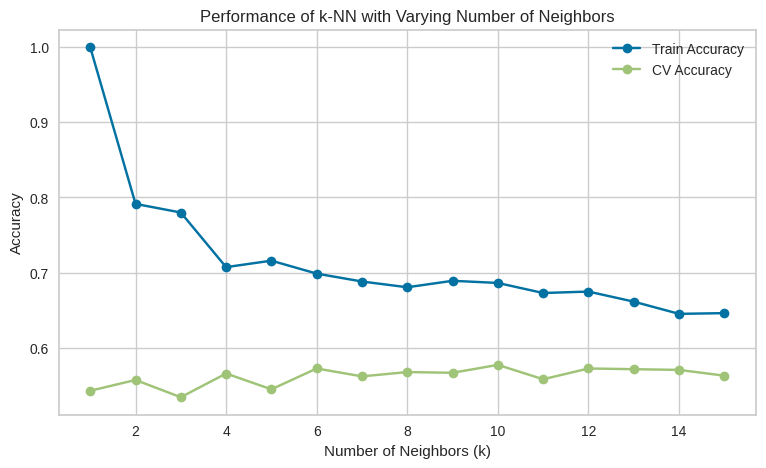

In [ ]:
# Accuracy vs k plot
n_neighbors_range = range(1, 16)
train_accuracies = []
cv_test_accuracies = []

for n in n_neighbors_range:
    model = KNeighborsClassifier(n_neighbors=n, metric='euclidean')
    model.fit(X_train, y_train)
    train_accuracies.append(model.score(X_train, y_train))
    cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    cv_test_accuracies.append(cv_score)

plt.figure(figsize=(9, 5))
plt.plot(n_neighbors_range, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(n_neighbors_range, cv_test_accuracies, label='CV Accuracy', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Performance of k-NN with Varying Number of Neighbors')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# GridSearchCV for best KNN model
param_grid = {
    'n_neighbors': [8, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean']
}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)

result = pd.DataFrame(grid_knn.cv_results_['params'])
result['mean_CV_test_score'] = grid_knn.cv_results_['mean_test_score']
print("🔧 Grid Search Results:")
display(result.sort_values(by='mean_CV_test_score', ascending=False))


🔧 Grid Search Results:


metric  n_neighbors   weights  mean_CV_test_score
5  euclidean           13  distance            0.582857
3  euclidean           11  distance            0.581905
7  euclidean           15  distance            0.580952
1  euclidean            8  distance            0.576190
4  euclidean           13   uniform            0.572381
0  euclidean            8   uniform            0.568571
6  euclidean           15   uniform            0.563810
2  euclidean           11   uniform            0.559048

In [ ]:
# Final tuned k-NN model
tuned_knn_model = KNeighborsClassifier(n_neighbors=13, weights='distance', metric='euclidean')
tuned_knn_model.fit(X_train, y_train)
y_pred_tuned = tuned_knn_model.predict(X_test)

In [ ]:
# Performance metrics for original model
train_accuracy_original = knn_model.score(X_train, y_train)
test_accuracy_original = accuracy_score(y_test, y_pred)
precision_original = precision_score(y_test, y_pred)
recall_original = recall_score(y_test, y_pred)
f1_original = f1_score(y_test, y_pred)
confusion_matrix_original = confusion_matrix(y_test, y_pred)

# Performance metrics for tuned model
train_accuracy_tuned = tuned_knn_model.score(X_train, y_train)
test_accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)
confusion_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)


In [ ]:
comparison_df = pd.DataFrame({
    'Evaluation Metric': ['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Original k-NN': [
        train_accuracy_original,
        test_accuracy_original,
        precision_original,
        recall_original,
        f1_original
    ],
    'Tuned k-NN': [
        train_accuracy_tuned,
        test_accuracy_tuned,
        precision_tuned,
        recall_tuned,
        f1_tuned
    ]
})

# Display comparison
print("📊 Final Model Comparison (Original vs Tuned k-NN):")
pd.set_option("display.precision", 4)
display(comparison_df)



📊 Final Model Comparison (Original vs Tuned k-NN):


Evaluation Metric  Original k-NN  Tuned k-NN
0    Train Accuracy         0.7800      0.9990
1     Test Accuracy         0.5844      0.5933
2         Precision         0.6108      0.6243
3            Recall         0.4956      0.4956
4          F1 Score         0.5472      0.5526

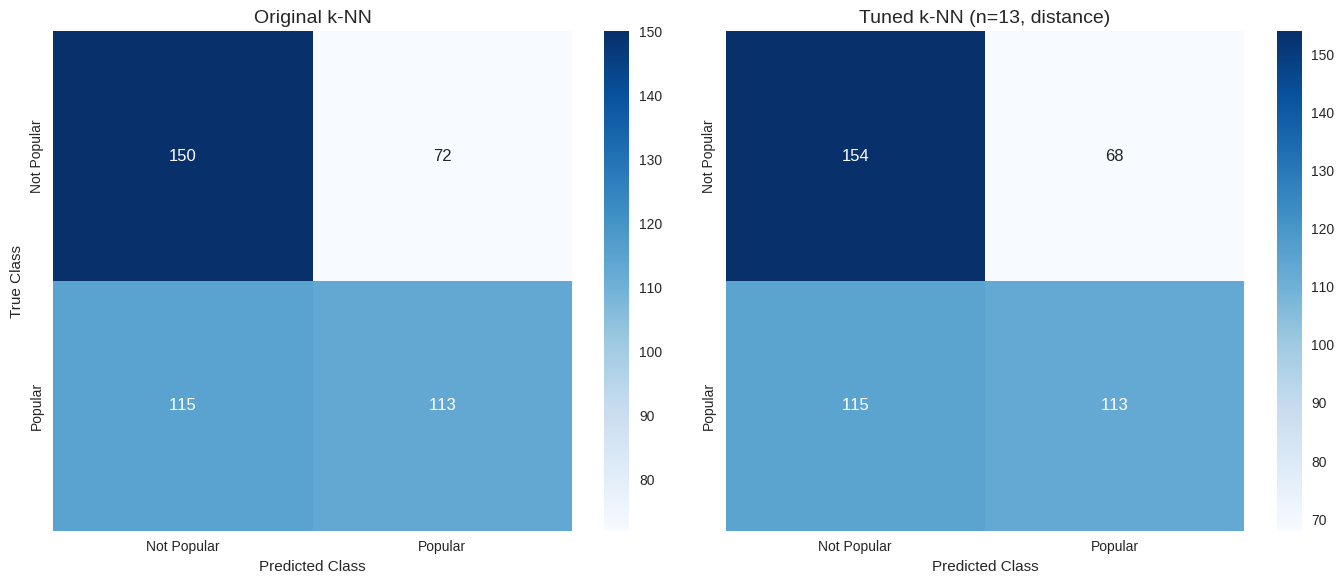

In [ ]:
# 🔵 Side-by-side confusion matrix plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Original
sns.heatmap(confusion_matrix_original, annot=True, fmt='d', cmap="Blues", xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_title('Original k-NN', fontsize=14)
axes[0].set_xlabel('Predicted Class')
axes[0].set_ylabel('True Class')

# Tuned
sns.heatmap(confusion_matrix_tuned, annot=True, fmt='d', cmap="Blues", xticklabels=class_names, yticklabels=class_names, ax=axes[1])
axes[1].set_title('Tuned k-NN (n=13, distance)', fontsize=14)
axes[1].set_xlabel('Predicted Class')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

##Model 3 - Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from yellowbrick.classifier import ClassificationReport
from IPython.display import display, Image
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import pandas as pd
import numpy as np

# 🎯 Define features and target
final_features4 = ['explicit', 'song_name_len', 'energy', 'loudness', 'speechiness', 'acousticness', 'tempo', 'rock', 'hiphop', 'dance', 'rnb']
X = df[final_features4]
y = df['popular_bin']

# 📦 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

feature_names = X_train.columns.tolist()
class_names = ['Not Popular', 'Popular']

In [ ]:
# 🌳 Initial Decision Tree
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_split=5, random_state=1)
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

# 📄 Text representation
text_representation = export_text(dt_clf, feature_names=feature_names)
print(text_representation)

|--- rock <= 0.50
|   |--- loudness <= -4.84
|   |   |--- song_name_len <= 9.50
|   |   |   |--- energy <= 0.78
|   |   |   |   |--- energy <= 0.49
|   |   |   |   |   |--- acousticness <= 0.12
|   |   |   |   |   |   |--- speechiness <= 0.06
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- speechiness >  0.06
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- acousticness >  0.12
|   |   |   |   |   |   |--- energy <= 0.27
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- energy >  0.27
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- energy >  0.49
|   |   |   |   |   |--- speechiness <= 0.04
|   |   |   |   |   |   |--- loudness <= -5.52
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- loudness >  -5.52
|   |   |   |   |   |   |   |--- loudness <= -5.49
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- loudness >  -5.49
|   |   |   |   |   |   |   |   |--- acou

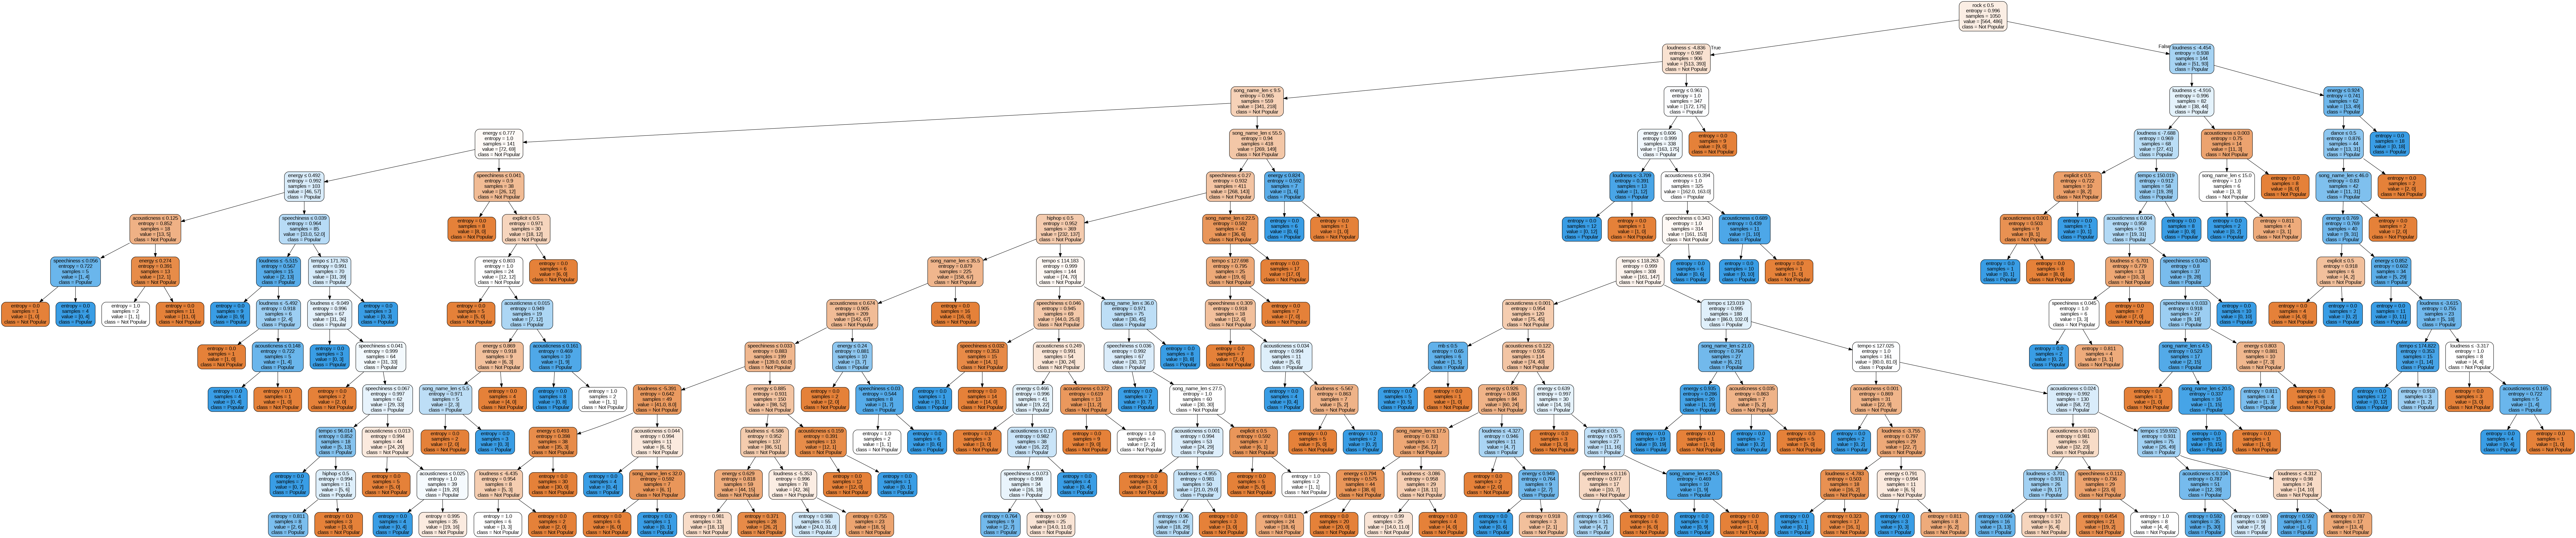

In [ ]:
# 🌲 Graph visualization
dot_data = export_graphviz(dt_clf, out_file=None, feature_names=feature_names, class_names=class_names,
                           filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data, format="png")
graph.render("decision_tree_graph")
display(Image(filename="decision_tree_graph.png"))

Evaluation Metric   Value
0    Train Accuracy  0.8467
1     Test Accuracy  0.5756
2            Recall  0.5088
3         Precision  0.5949
4          F1 Score  0.5485

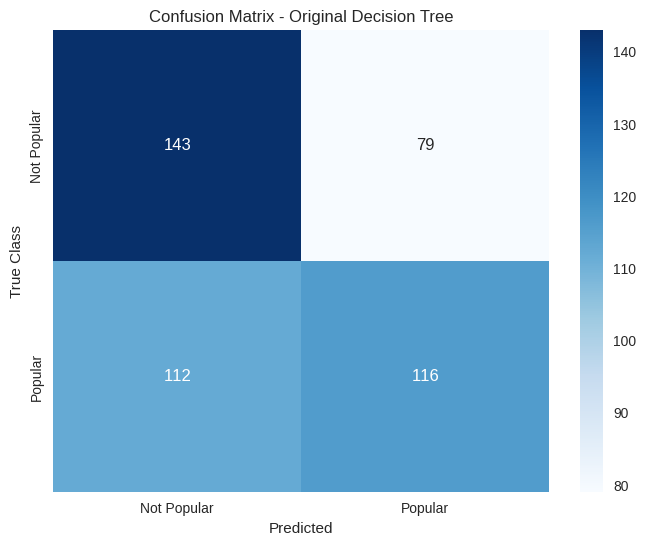

In [ ]:
# Evaluation Metrics
evaluation_metrics = pd.DataFrame({
    "Evaluation Metric": ["Train Accuracy", "Test Accuracy", "Recall", "Precision", "F1 Score"],
    "Value": [
        dt_clf.score(X_train, y_train),
        accuracy_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ]
})
display(evaluation_metrics)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('True Class')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Original Decision Tree')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



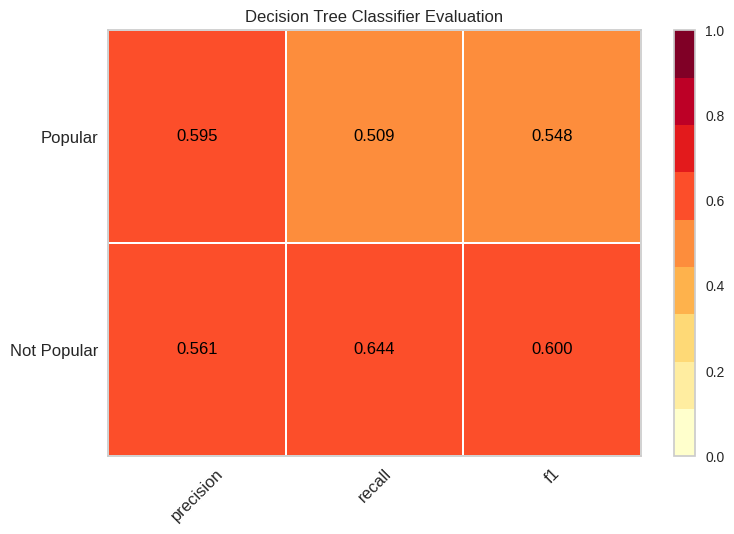

<Axes: title={'center': 'Decision Tree Classifier Evaluation'}>

In [ ]:
# 🎨 Yellowbrick report
visualizer = ClassificationReport(dt_clf, classes=class_names, support=False, title="Decision Tree Classifier Evaluation")
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

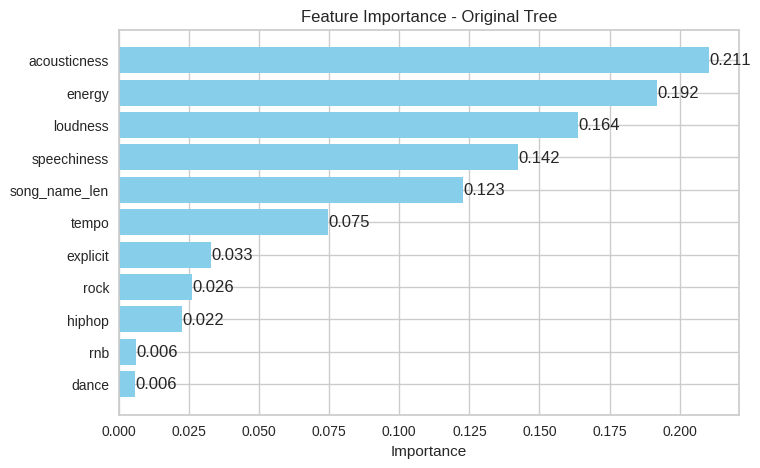

In [ ]:
# 🌟 Feature Importance
feature_importances = dt_clf.feature_importances_
feature_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
plt.barh(feature_df['Feature'], feature_df['Importance'], color='skyblue')
for index, value in enumerate(feature_df['Importance']):
    plt.text(value, index, f'{value:.3f}', va='center')
plt.xlabel('Importance')
plt.title('Feature Importance - Original Tree')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# 🔁 Cross-validation
y_pred_cross = cross_val_predict(dt_clf, X_train, y_train, cv=5)
evaluation_metrics_cv = pd.DataFrame({
    "Evaluation Metric_CV": ["Train Accuracy", "Test Accuracy", "Recall", "Precision", "F1 Score"],
    "Value": [
        accuracy_score(y_train, y_pred_cross),
        accuracy_score(y_train, y_pred_cross),  # Same as train
        recall_score(y_train, y_pred_cross),
        precision_score(y_train, y_pred_cross),
        f1_score(y_train, y_pred_cross)
    ]
})
print("Cross-Validation Metrics:")
display(evaluation_metrics_cv)
print("Confusion Matrix - CV:\n", confusion_matrix(y_train, y_pred_cross))


Cross-Validation Metrics:


Evaluation Metric_CV   Value
0       Train Accuracy  0.5076
1        Test Accuracy  0.5076
2               Recall  0.4239
3            Precision  0.4650
4             F1 Score  0.4435

Confusion Matrix - CV:
 [[327 237]
 [280 206]]


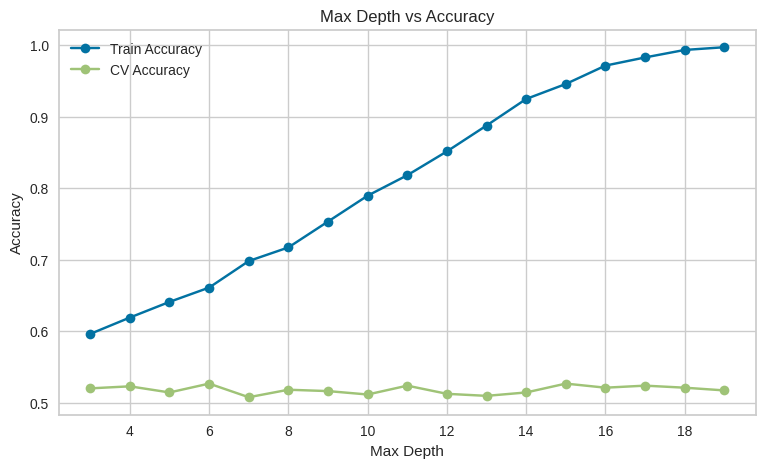

In [ ]:
# 📈 Max Depth Tuning
depths = range(3, 20)
train_acc, cv_acc = [], []
for d in depths:
    model = DecisionTreeClassifier(criterion='entropy', max_depth=d, random_state=1)
    model.fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train))
    cv_acc.append(cross_val_score(model, X_train, y_train, cv=5).mean())

plt.figure(figsize=(9, 5))
plt.plot(depths, train_acc, label='Train Accuracy', marker='o')
plt.plot(depths, cv_acc, label='CV Accuracy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Max Depth vs Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 🛠️ Grid Search
param_grid = {
    'max_depth': [4, 6, 8],
    'min_samples_split': [5, 10, 20],
    'splitter': ['best']
}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid=param_grid, cv=10)
grid_dt.fit(X_train, y_train)

result = pd.DataFrame(grid_dt.cv_results_['params'])
result['mean_CV_test_score'] = grid_dt.cv_results_['mean_test_score']
display(result.sort_values(by='mean_CV_test_score', ascending=False))



max_depth  min_samples_split splitter  mean_CV_test_score
3          6                  5     best              0.5467
5          6                 20     best              0.5438
4          6                 10     best              0.5429
8          8                 20     best              0.5333
6          8                  5     best              0.5267
7          8                 10     best              0.5238
0          4                  5     best              0.5229
2          4                 20     best              0.5219
1          4                 10     best              0.5200

In [ ]:
dt_clf_tune = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=5, splitter='best', random_state=1)
dt_clf_tune.fit(X_train, y_train)
y_pred_tune = dt_clf_tune.predict(X_test)

In [ ]:
# 📉 Final Comparison Table
comparison_df = pd.DataFrame({
    'Evaluation Metric': ['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Original Decision Tree': [
        dt_clf.score(X_train, y_train),
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ],
    'Tuned Decision Tree': [
        dt_clf_tune.score(X_train, y_train),
        accuracy_score(y_test, y_pred_tune),
        precision_score(y_test, y_pred_tune),
        recall_score(y_test, y_pred_tune),
        f1_score(y_test, y_pred_tune)
    ]
})
display(comparison_df)

Evaluation Metric  Original Decision Tree  Tuned Decision Tree
0    Train Accuracy                  0.8467               0.6600
1     Test Accuracy                  0.5756               0.5133
2         Precision                  0.5949               0.5413
3            Recall                  0.5088               0.2588
4          F1 Score                  0.5485               0.3501

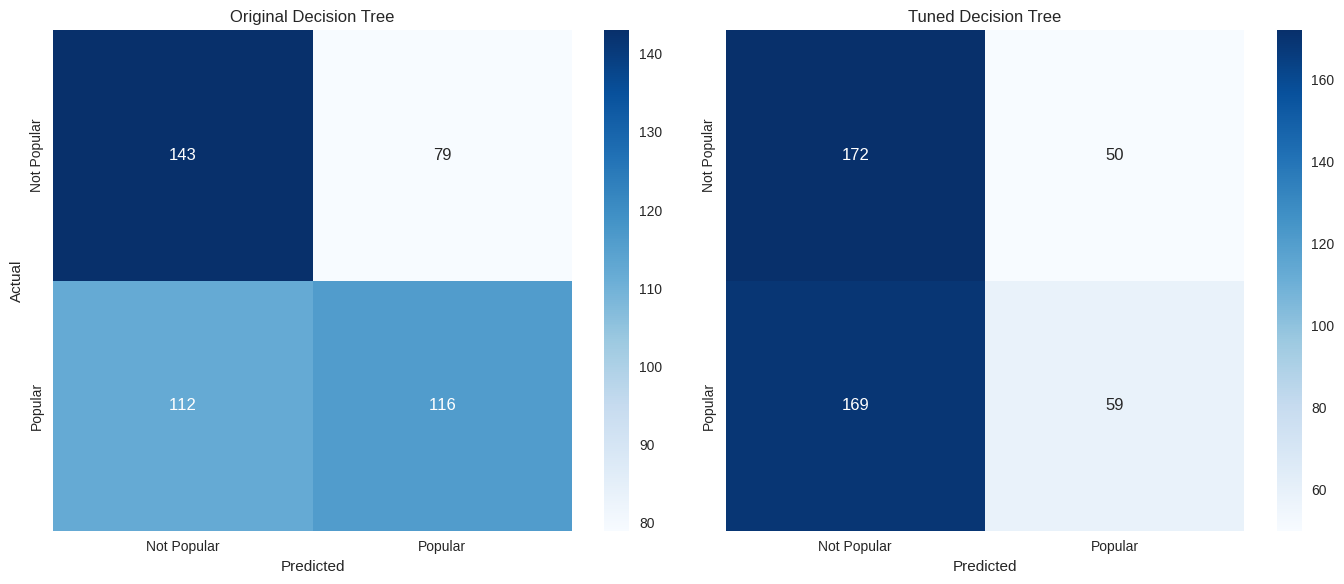

In [ ]:
# 🔵 Confusion Matrix Comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues", xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_title('Original Decision Tree')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, y_pred_tune), annot=True, fmt='d', cmap="Blues", xticklabels=class_names, yticklabels=class_names, ax=axes[1])
axes[1].set_title('Tuned Decision Tree')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('')
plt.tight_layout()
plt.show()

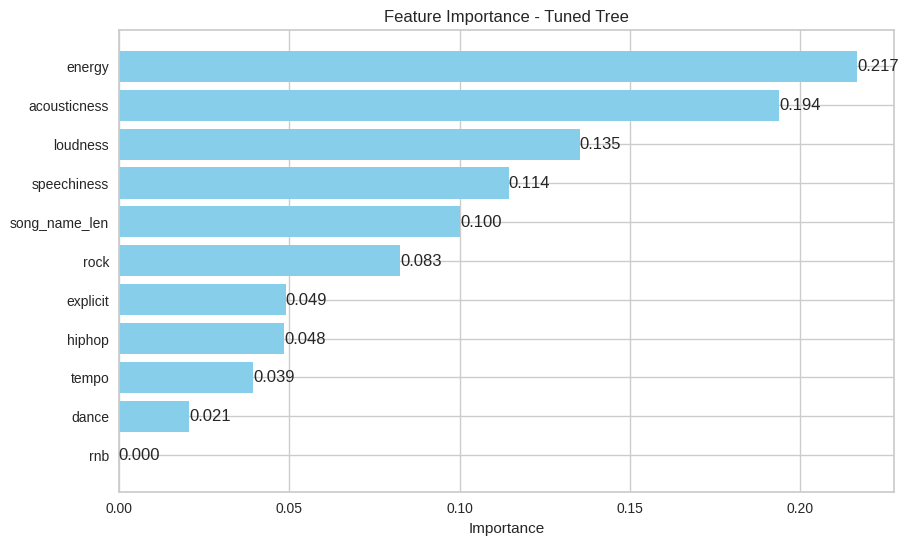

In [ ]:
# 🎯 Tuned Feature Importance
feature_importances_tune = dt_clf_tune.feature_importances_
feature_df_tuned = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances_tune}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_df_tuned['Feature'], feature_df_tuned['Importance'], color='skyblue')
for index, value in enumerate(feature_df_tuned['Importance']):
    plt.text(value, index, f'{value:.3f}', va='center')
plt.xlabel('Importance')
plt.title('Feature Importance - Tuned Tree')
plt.gca().invert_yaxis()
plt.show()

### Q2: Model Selection Based on Profit

In this section, we compute the expected profit for each model using the confusion matrix. The profit is calculated as:

 +$1000 for each True Positive (TP)

 −$700 for each False Positive (FP)

 −$900 for each False Negative (FN)

 $0 for True Negatives (TN)

The goal is to identify which model minimizes losses and maximizes revenue.


In [ ]:
import pandas as pd

# Step 1: Define profit calculation function
def calculate_profit(tp, fp, fn, tn):
    return (tp * 1000) - (fp * 700) - (fn * 900)

# Step 2: Define confusion matrices: [TN, FP, FN, TP]
conf_matrices = {
    "Logistic Regression (No CV)": [151, 88, 100, 111],
    "Logistic Regression (CV)": [519, 267, 347, 367],
    "k-NN (No CV)": [150, 72, 115, 113],
    "k-NN (CV)": [450, 336, 341, 373],
    "Tuned k-NN": [154, 68, 115, 113],
    "Decision Tree (No CV)": [143, 79, 112, 116],
    "Decision Tree (CV)": [327, 237, 280, 206],
    "Tuned Decision Tree": [172, 50, 169, 59],
}

# Step 3: Calculate profit for each model
profits = {
    model: calculate_profit(tp, fp, fn, tn)
    for model, (tn, fp, fn, tp) in conf_matrices.items()
}

# Step 4: Convert to DataFrame for display
profits_df = pd.DataFrame(list(profits.items()), columns=["Model", "Profit ($)"])
profits_df = profits_df.sort_values(by="Profit ($)", ascending=False).reset_index(drop=True)

# Step 5: Show profit comparison
print("💰 Profit Based on Confusion Matrix:")
display(profits_df)

# Optional: Highlight best model
best_model = profits_df.iloc[0]
print(f"\n🏆 Best model based on profit: {best_model['Model']} with profit ${best_model['Profit ($)']:,}")


💰 Profit Based on Confusion Matrix:


Model  Profit ($)
0                   Tuned k-NN      -38100
1        Decision Tree (No CV)      -40100
2  Logistic Regression (No CV)      -40600
3                 k-NN (No CV)      -40900
4          Tuned Decision Tree     -128100
5     Logistic Regression (CV)     -132200
6                    k-NN (CV)     -169100
7           Decision Tree (CV)     -211900


🏆 Best model based on profit: Tuned k-NN with profit $-38,100


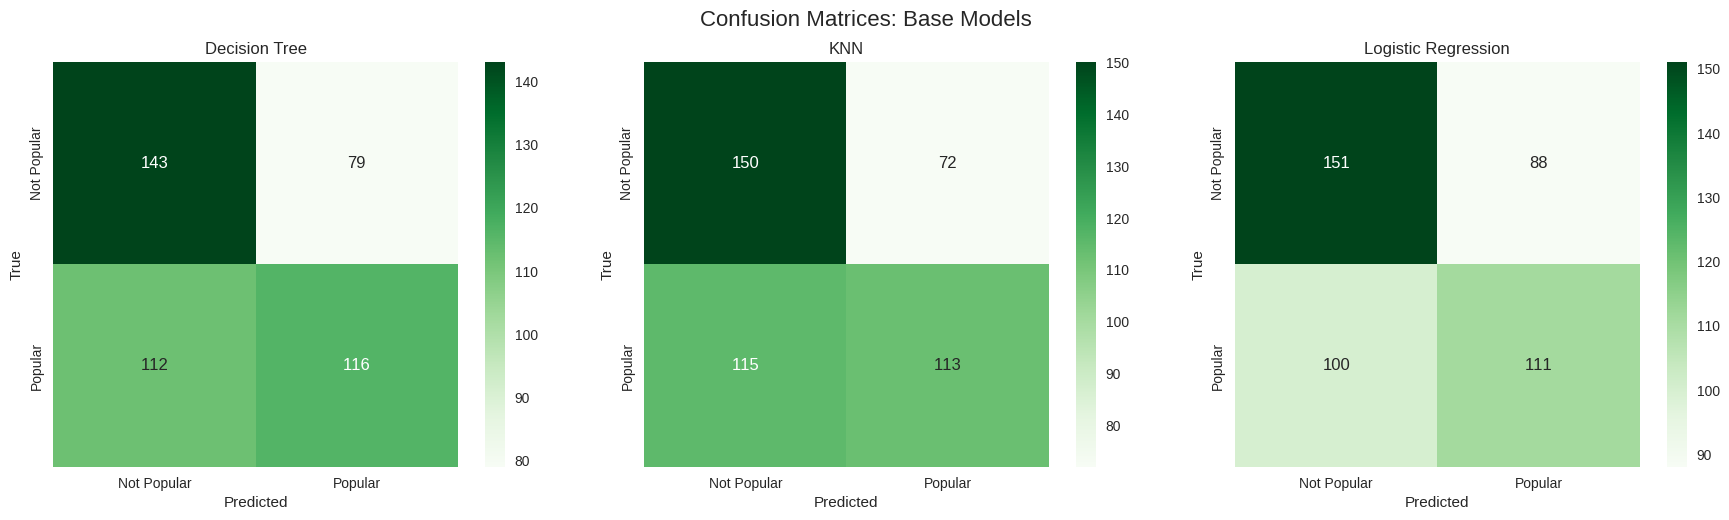

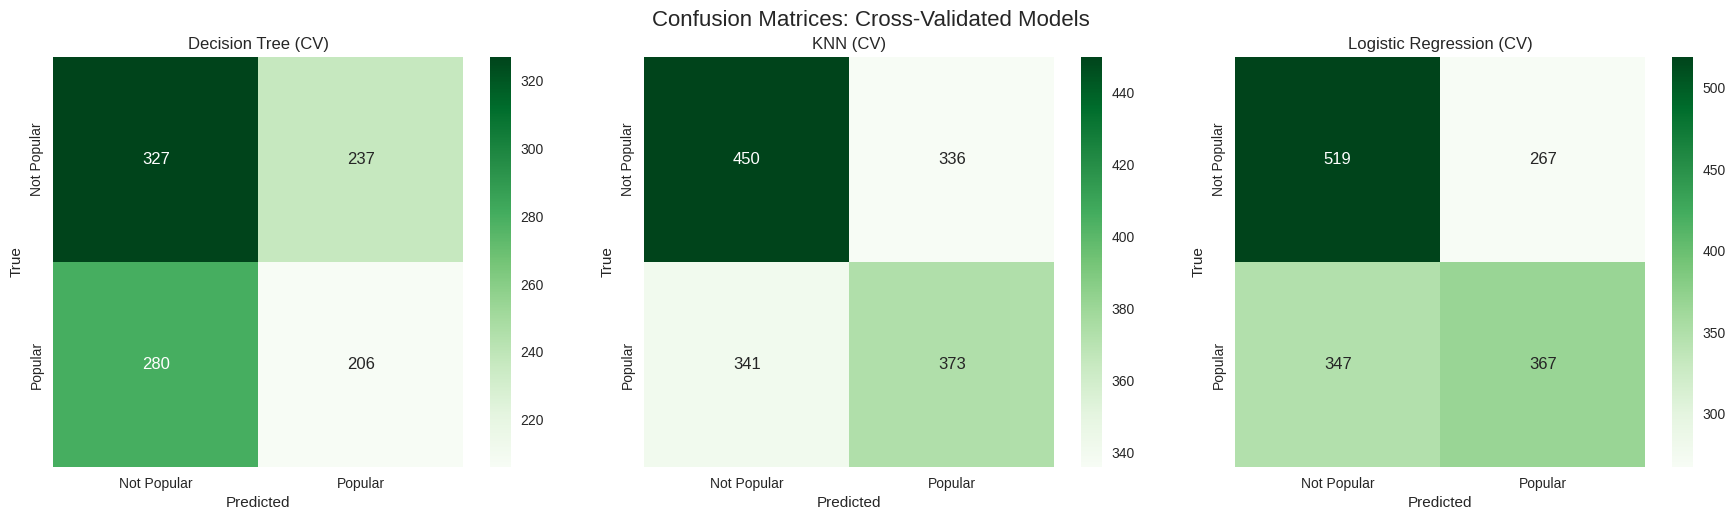

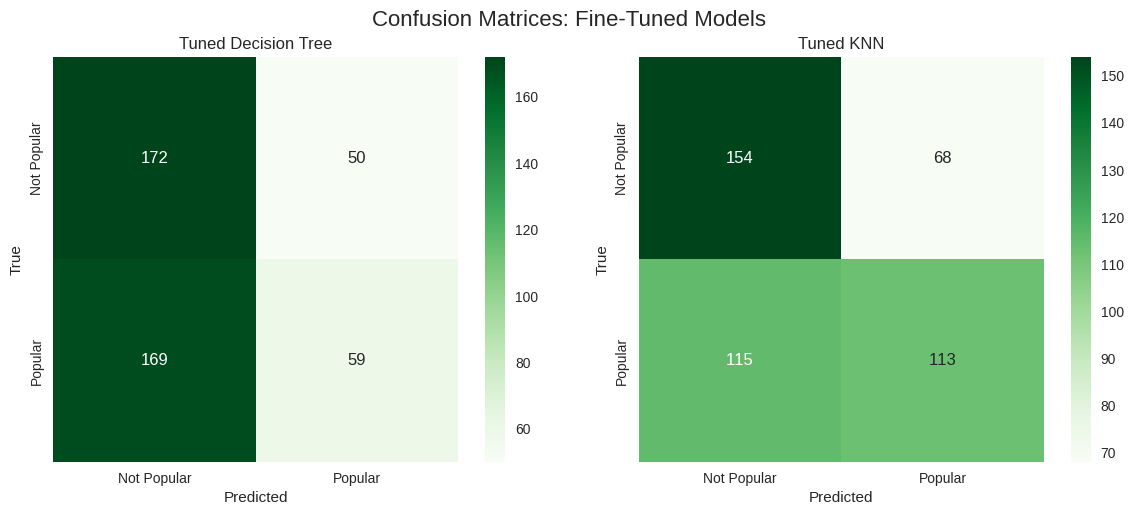

In [ ]:
# Re-import necessary libraries after kernel reset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Define confusion matrices again after reset
base_conf_matrices = {
    'Decision Tree': [[143, 79], [112, 116]],
    'KNN': [[150, 72], [115, 113]],
    'Logistic Regression': [[151, 88], [100, 111]]
}

cv_conf_matrices = {
    'Decision Tree (CV)': [[327, 237], [280, 206]],
    'KNN (CV)': [[450, 336], [341, 373]],
    'Logistic Regression (CV)': [[519, 267], [347, 367]]
}

tuned_conf_matrices = {
    'Tuned Decision Tree': [[172, 50], [169, 59]],
    'Tuned KNN': [[154, 68], [115, 113]]
}

# Function to plot confusion matrices
def plot_conf_matrices(conf_matrices, title):
    fig, axes = plt.subplots(1, len(conf_matrices), figsize=(6 * len(conf_matrices), 5))
    if len(conf_matrices) == 1:
        axes = [axes]
    for ax, (model, matrix) in zip(axes, conf_matrices.items()):
        sns.heatmap(matrix, annot=True, fmt='d', cmap='Greens',
                    xticklabels=['Not Popular', 'Popular'],
                    yticklabels=['Not Popular', 'Popular'], ax=ax, square=True)
        ax.set_title(f'{model}')
        ax.set_xlabel('Predicted')
        ax.set_ylabel('True')
    fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Plotting all model groups
plot_conf_matrices(base_conf_matrices, "Confusion Matrices: Base Models")
plot_conf_matrices(cv_conf_matrices, "Confusion Matrices: Cross-Validated Models")
plot_conf_matrices(tuned_conf_matrices, "Confusion Matrices: Fine-Tuned Models")


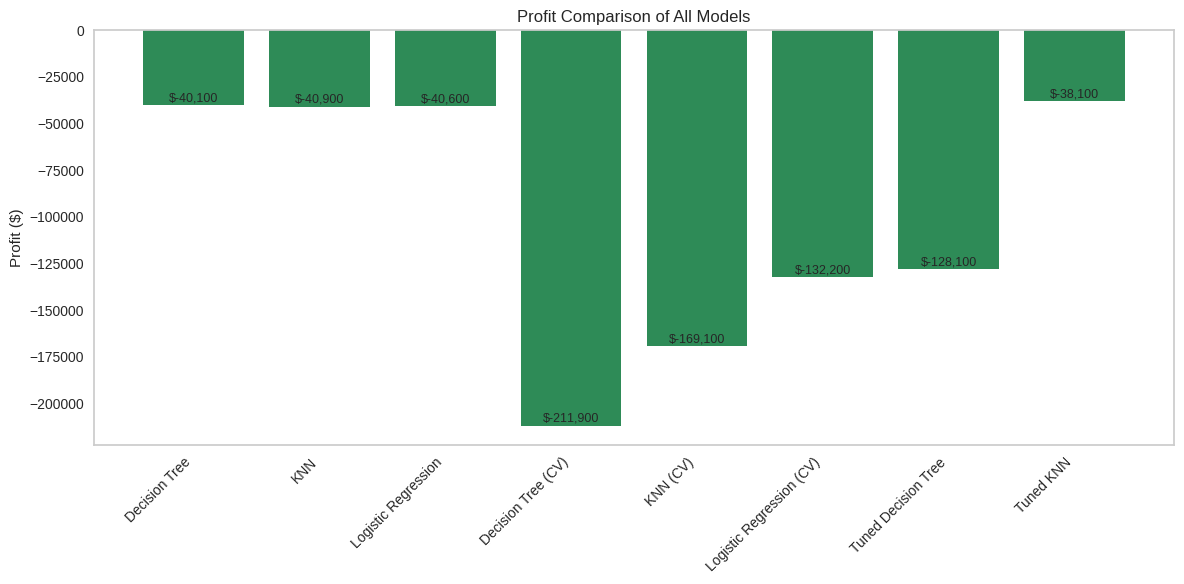

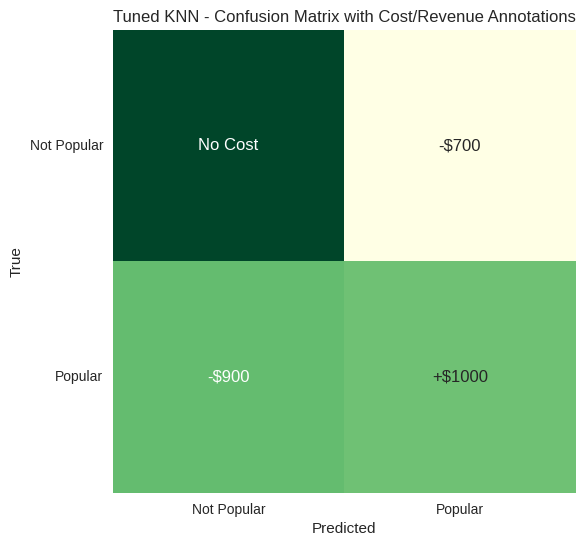

Model               Best For  Test Accuracy  F1 Score  \
0             Decision Tree       Interpretability         0.5756    0.5485   
1                       KNN                Balance         0.5844    0.5472   
2       Logistic Regression              Stability         0.5822    0.5415   
3        Decision Tree (CV)  Interpretability (CV)         0.5076    0.4435   
4                  KNN (CV)            High Recall         0.5844    0.5242   
5  Logistic Regression (CV)            Consistency         0.5907    0.5445   
6       Tuned Decision Tree   Fine-tuned Precision         0.5133    0.3501   
7                 Tuned KNN    Overall Best Profit         0.5933    0.5526   

   Profit ($)          Key Strength       Main Weakness  
0      -40100  Clear decision rules        Overfit risk  
1      -40900      Balanced metrics      Slight overfit  
2      -40600    Stable predictions  Moderate precision  
3     -211900    Better recall (CV)        Low accuracy  
4     -169100         Recall-driven           Higher FP  
5     -132200          Good balance        Costly FP/FN  
6     -128100                Low FP            Underfit  
7      -38100       Top profit & F1        Mild overfit

In [ ]:
# Combine all confusion matrices for profit analysis
all_matrices = {**base_conf_matrices, **cv_conf_matrices, **tuned_conf_matrices}

# Profit calculation function
def calc_profit(cm):
    cm = np.array(cm)  # Convert to NumPy array
    tn, fp, fn, tp = cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]
    return (tp * 1000) - (fp * 700) - (fn * 900)

# Calculate profit for all models
profits = {model: calc_profit(cm) for model, cm in all_matrices.items()}

# Bar chart for profits
plt.figure(figsize=(12, 6))
models = list(profits.keys())
profit_values = list(profits.values())
bars = plt.bar(models, profit_values, color='seagreen')
plt.title("Profit Comparison of All Models")
plt.ylabel("Profit ($)")
plt.xticks(rotation=45, ha='right')
plt.grid(False)

# Annotate bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 2000, f"${int(height):,}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# Revenue/cost annotated confusion matrix (example: Tuned KNN)
annot_labels = [['No Cost', '-$700'], ['-$900', '+$1000']]
example_cm = tuned_conf_matrices['Tuned KNN']

plt.figure(figsize=(6, 6))
sns.heatmap(example_cm, annot=annot_labels, fmt='', cmap='YlGn', cbar=False, square=True)
plt.title("Tuned KNN - Confusion Matrix with Cost/Revenue Annotations")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks([0.5, 1.5], ['Not Popular', 'Popular'])
plt.yticks([0.5, 1.5], ['Not Popular', 'Popular'], rotation=0)
plt.tight_layout()
plt.show()

# Summary table of models
summary = pd.DataFrame({
    'Model': list(base_conf_matrices.keys()) + list(cv_conf_matrices.keys()) + list(tuned_conf_matrices.keys()),
    'Best For': ['Interpretability', 'Balance', 'Stability',
                 'Interpretability (CV)', 'High Recall', 'Consistency',
                 'Fine-tuned Precision', 'Overall Best Profit'],
    'Test Accuracy': [0.5756, 0.5844, 0.5822, 0.5076, 0.5844, 0.5907, 0.5133, 0.5933],
    'F1 Score': [0.5485, 0.5472, 0.5415, 0.4435, 0.5242, 0.5445, 0.3501, 0.5526],
    'Profit ($)': [calc_profit(cm) for cm in list(base_conf_matrices.values()) +
                   list(cv_conf_matrices.values()) + list(tuned_conf_matrices.values())],
    'Key Strength': ['Clear decision rules', 'Balanced metrics', 'Stable predictions',
                     'Better recall (CV)', 'Recall-driven', 'Good balance',
                     'Low FP', 'Top profit & F1'],
    'Main Weakness': ['Overfit risk', 'Slight overfit', 'Moderate precision',
                      'Low accuracy', 'Higher FP', 'Costly FP/FN',
                      'Underfit', 'Mild overfit']
})

summary


In [ ]:
##install the pywaffle package for visualization
!pip install pywaffle matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 56.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import data as dataframe
file_path = '/content/drive/MyDrive/Spring25/BusinessDataAnalytics/Group Project/songs_utf.csv'
df = pd.read_csv(file_path)

# calling head() method
df.head()

artist                    song  song_name_len  duration_ms  \
0  Britney Spears  Oops!...I Did It Again           22.0     211160.0   
1       blink-182    All The Small Things           20.0     167066.0   
2      Faith Hill                 Breathe            7.0     250546.0   
3        Bon Jovi            It's My Life           12.0     224493.0   
4          *NSYNC             Bye Bye Bye           11.0     200560.0   

  explicit    year  popularity  hot  danceability  energy  ...  valence  \
0    False  2000.0        77.0  1.0         0.751   0.834  ...    0.894   
1    False  1999.0        79.0  1.0         0.434   0.897  ...    0.684   
2    False  1999.0        66.0  0.0         0.529   0.496  ...    0.278   
3    False  2000.0        78.0  1.0         0.551   0.913  ...    0.544   
4    False  2000.0        65.0  0.0         0.614   0.928  ...    0.879   

     tempo         genre  pop  rock  hiphop  dance  folk  rnb latin  
0   95.053           pop  1.0   0.0     0.0    0.0   0.0  0.0   0.0  
1  148.726     rock, pop  1.0   1.0     0.0    0.0   0.0  0.0   0.0  
2  136.859  pop, country  1.0   0.0     0.0    0.0   0.0  0.0   0.0  
3  119.992   rock, metal  0.0   1.0     0.0    0.0   0.0  0.0   0.0  
4  172.656           pop  1.0   0.0     0.0    0.0   0.0  0.0   0.0  

[5 rows x 27 columns]

In [ ]:
df.describe()

song_name_len  duration_ms       year  popularity        hot  \
count      1500.0000    1500.0000  1500.0000    1500.000  1500.0000   
mean         17.5527  234667.9233  2007.0340      59.414     0.1280   
std          11.5413   38723.1320     4.5677      19.346     0.3342   
min           2.0000  127920.0000  1998.0000       0.000     0.0000   
25%           9.0000  209116.5000  2003.0000      56.000     0.0000   
50%          14.0000  228973.0000  2007.0000      64.000     0.0000   
75%          23.0000  254086.0000  2011.0000      71.000     0.0000   
max          75.0000  484146.0000  2020.0000      89.000     1.0000   

       danceability     energy        key   loudness       mode  ...  \
count     1500.0000  1500.0000  1500.0000  1500.0000  1500.0000  ...   
mean         0.6594     0.7370     5.3653    -5.4346     0.5620  ...   
std          0.1422     0.1519     3.5874     1.9151     0.4963  ...   
min          0.1290     0.0549     0.0000   -20.5140     0.0000  ...   
25%          0.5680     0.6458     2.0000    -6.4525     0.0000  ...   
50%          0.6700     0.7540     6.0000    -5.1790     1.0000  ...   
75%          0.7580     0.8572     8.0000    -4.1425     1.0000  ...   
max          0.9750     0.9990    11.0000    -0.2760     1.0000  ...   

        liveness    valence      tempo        pop       rock     hiphop  \
count  1500.0000  1500.0000  1500.0000  1500.0000  1500.0000  1500.0000   
mean      0.1873     0.5735   119.8849     0.8233     0.1340     0.3853   
std       0.1468     0.2211    26.7621     0.3815     0.3408     0.4868   
min       0.0234     0.0381    60.0190     0.0000     0.0000     0.0000   
25%       0.0862     0.4110    98.5513     1.0000     0.0000     0.0000   
50%       0.1290     0.5840   120.0925     1.0000     0.0000     0.0000   
75%       0.2560     0.7552   133.1262     1.0000     0.0000     1.0000   
max       0.8530     0.9730   210.8510     1.0000     1.0000     1.0000   

           dance       folk        rnb      latin  
count  1500.0000  1500.0000  1500.0000  1500.0000  
mean      0.1580     0.0107     0.2647     0.0253  
std       0.3649     0.1028     0.4413     0.1572  
min       0.0000     0.0000     0.0000     0.0000  
25%       0.0000     0.0000     0.0000     0.0000  
50%       0.0000     0.0000     0.0000     0.0000  
75%       0.0000     0.0000     1.0000     0.0000  
max       1.0000     1.0000     1.0000     1.0000  

[8 rows x 23 columns]

In [ ]:
df.columns

Index(['artist', 'song', 'song_name_len', 'duration_ms', 'explicit', 'year',
       'popularity', 'hot', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'genre', 'pop', 'rock', 'hiphop', 'dance', 'folk',
       'rnb', 'latin'],
      dtype='object')

In [ ]:
# df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            1500 non-null   object 
 1   song              1500 non-null   object 
 2   song_name_len     1500 non-null   float64
 3   duration_ms       1500 non-null   float64
 4   explicit          1500 non-null   object 
 5   year              1500 non-null   float64
 6   popularity        1500 non-null   float64
 7   hot               1500 non-null   float64
 8   danceability      1500 non-null   float64
 9   energy            1500 non-null   float64
 10  key               1500 non-null   float64
 11  loudness          1500 non-null   float64
 12  mode              1500 non-null   float64
 13  speechiness       1500 non-null   float64
 14  acousticness      1500 non-null   float64
 15  instrumentalness  1500 non-null   float64
 16  liveness          1500 non-null   float64


In [ ]:
display(df.isnull().sum())

artist              499
song                499
song_name_len       499
duration_ms         499
explicit            499
year                499
popularity          499
hot                 499
danceability        499
energy              499
key                 499
loudness            499
mode                499
speechiness         499
acousticness        499
instrumentalness    499
liveness            499
valence             499
tempo               499
genre               499
pop                 499
rock                499
hiphop              499
dance               499
folk                499
rnb                 499
latin               499
dtype: int64

In [ ]:
df = df.dropna() ##drop missing value

In [ ]:
display(df.isna().sum()) ##recheck missing value again

artist              0
song                0
song_name_len       0
duration_ms         0
explicit            0
year                0
popularity          0
hot                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
pop                 0
rock                0
hiphop              0
dance               0
folk                0
rnb                 0
latin               0
dtype: int64

In [ ]:
# 🎯 Select clustering features - WITHOUT optional genres
df_sub = df[['danceability', 'energy',"rock","hiphop","dance","rnb"]]

# Normalize and Standardize
norm_scaler = MinMaxScaler()
data_norm = norm_scaler.fit_transform(df_sub)

std_scaler = StandardScaler()
data_std = std_scaler.fit_transform(df_sub)

##Clustering Method - KMeans

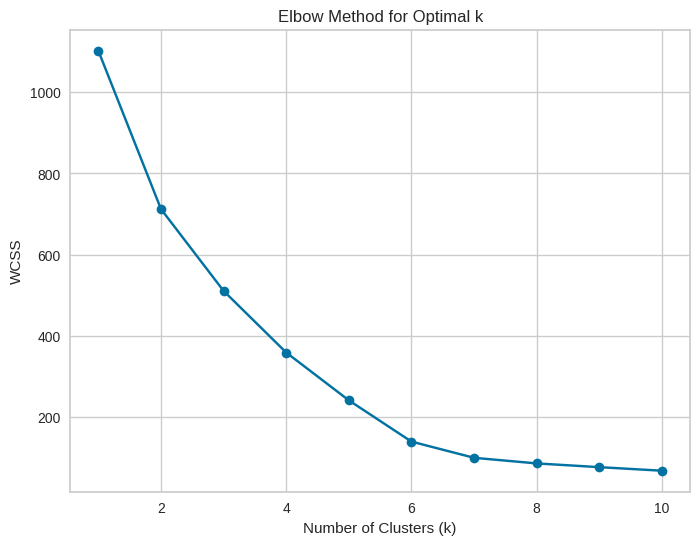

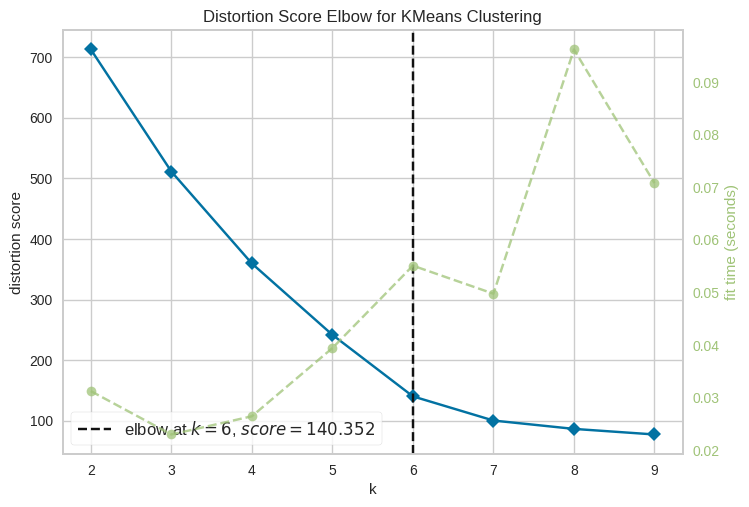

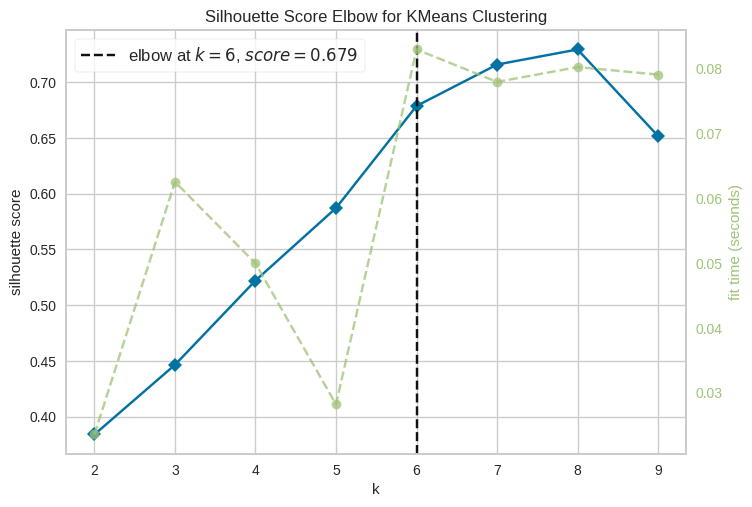

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
# Elbow Method (WCSS)
wcss = []
for i in range(1, 11):
    kmeans_WCSS = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=1)
    kmeans_WCSS.fit(data_norm)
    wcss.append(kmeans_WCSS.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Elbow + Silhouette Score with Yellowbrick
model_Elbow = KMeans(init='k-means++', n_init=10, random_state=1)
visualizer = KElbowVisualizer(model_Elbow, k=(2, 10), metric='distortion')
visualizer.fit(data_norm)
visualizer.show()

model_sil = KMeans(init='k-means++', n_init=10, random_state=1)
visualizer = KElbowVisualizer(model_sil, k=(2, 10), metric='silhouette')
visualizer.fit(data_norm)
visualizer.show()


In [ ]:
optimal_k = 6  # set based on elbow/silhouette
kmeans_optimal = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=1)
df_sub['cluster'] = kmeans_optimal.fit_predict(data_norm)


<ipython-input-104-6438016521c5>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Silhouette Score for k=6: 0.679



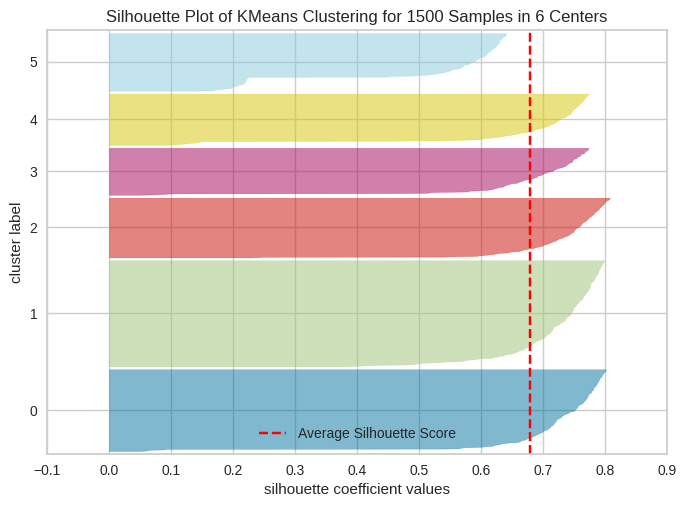

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1500 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Silhouette Score
silhouette_avg = silhouette_score(data_norm, df_sub['cluster'])
print(f'\nSilhouette Score for k={optimal_k}: {silhouette_avg:.3f}\n')

visualizer = SilhouetteVisualizer(kmeans_optimal, colors='yellowbrick')
visualizer.fit(data_norm)
visualizer.show()

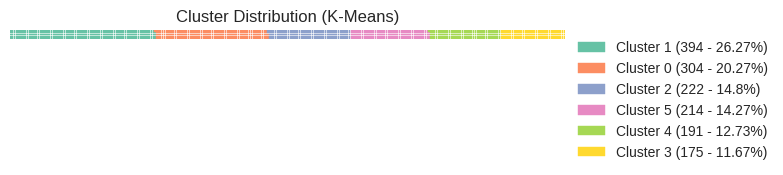

In [ ]:
# Waffle Chart
cluster_counts = df_sub['cluster'].value_counts()
total = cluster_counts.sum()
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=cluster_counts,
    title={'label': 'Cluster Distribution (K-Means)', 'loc': 'center'},
    labels=[f"Cluster {i} ({count} - {round((count / total) * 100, 2)}%)" for i, count in cluster_counts.items()],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1.2)},
    figsize=(8, 5)
)
plt.show()


In [ ]:
def generate_cluster_profile(data_norm, k, df_original):
    kmeans_optimal = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=1)
    df_sub = df_original.copy()
    df_sub['cluster'] = kmeans_optimal.fit_predict(data_norm)
    df_calculate = df_sub.copy()
    df_calculate['cluster_result'] = 'Cluster ' + df_calculate['cluster'].astype(str)
    df_mean_calculation = df_calculate.drop(columns=['cluster'])
    df_mean_feature = df_mean_calculation.drop(columns=['cluster_result'])

    overall_means = df_mean_feature.mean().to_frame().T
    overall_means.index = ['Overall']
    df_cluster_summary = df_mean_calculation.groupby('cluster_result').mean()
    df_profile = pd.concat([df_cluster_summary, overall_means], axis=0)

    cluster_counts = df_calculate['cluster_result'].value_counts()
    cluster_percentages = (cluster_counts / cluster_counts.sum()) * 100
    df_count_percentage = pd.DataFrame({'Count': cluster_counts, 'Percentage': cluster_percentages})
    df_count_percentage.loc['Overall'] = [len(df_calculate), 100.0]
    df_profile = pd.concat([df_profile, df_count_percentage], axis=1)

    df_overall = df_profile.loc['Overall']
    df_profile = df_profile.drop(index='Overall')
    df_profile = df_profile.sort_values(by='Count', ascending=False)
    df_profile = pd.concat([df_profile, df_overall.to_frame().T])

    df_profile = df_profile.style.format({
        "Count": "{:.0f}",
        **{col: "{:.2f}" for col in df_profile.columns if col != "Count"}
    }).background_gradient(cmap='Purples')

    return df_profile

# Call it
df_profile_k4 = generate_cluster_profile(data_norm, 4, df[['danceability', 'energy',"rock","hiphop","dance","rnb"]])
display(df_profile_k4)


🔸 Average Silhouette Score for k=6: 0.679


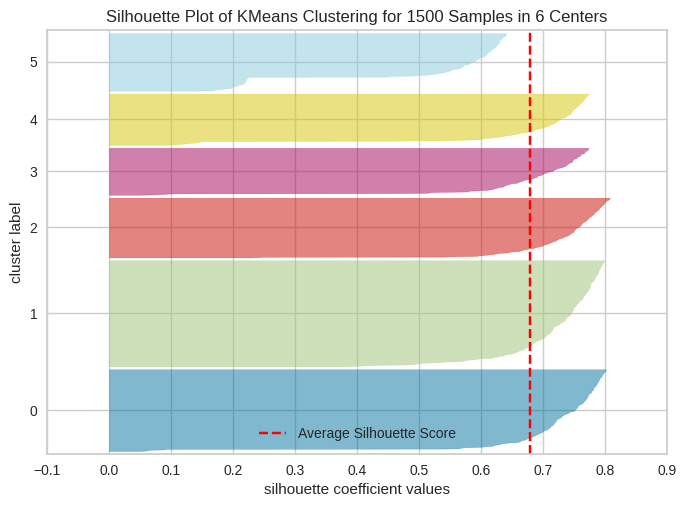

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1500 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:


# --- K = 6 ---
model_k6 = KMeans(n_clusters=6, init='k-means++', random_state=1)
model_k6.fit(data_norm)

silhouette_score_k6 = silhouette_score(data_norm, model_k6.labels_)
print(f"🔸 Average Silhouette Score for k=6: {silhouette_score_k6:.3f}")

visualizer_k6 = SilhouetteVisualizer(model_k6, colors='yellowbrick')
visualizer_k6.fit(data_norm)
visualizer_k6.show()


In [ ]:
# ✅ Generate Cluster Profiles for interpretation


df_profile_k6 = generate_cluster_profile(data_norm, 6, df_sub)

print("\n🔍 Cluster Profile Summary for k = 6")
display(df_profile_k6)



🔍 Cluster Profile Summary for k = 6


##Clustering 2 - Agglomerative

In [ ]:
# Install required packages
!pip install pywaffle yellowbrick --quiet

# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from pywaffle import Waffle


In [ ]:
# Select audio + genre features
df_sub = df[['danceability', 'energy',"rock","hiphop","dance","rnb"]]

# Normalize features
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(df_sub)

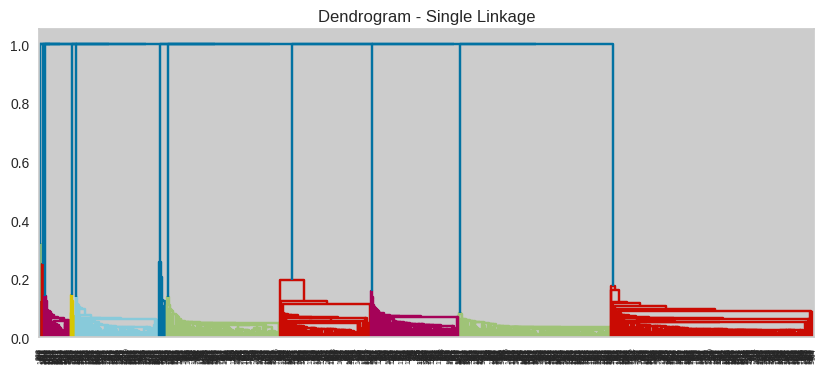

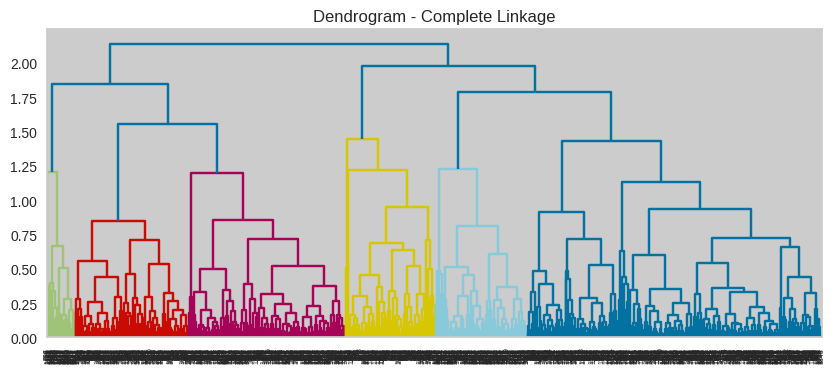

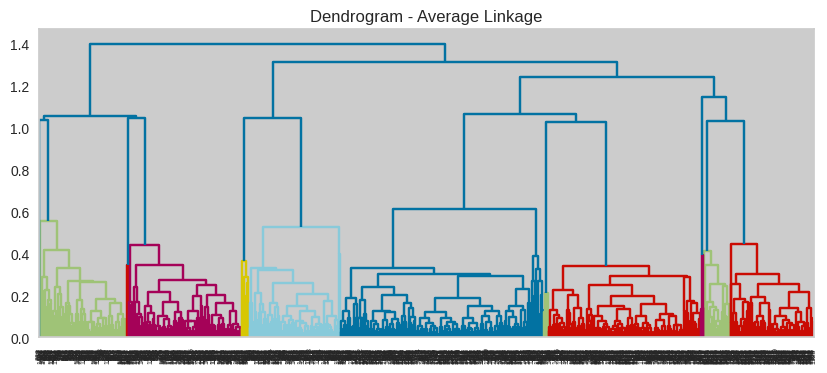

In [ ]:
for method in ['single', 'complete', 'average']:
    linked = linkage(data_norm, method=method)
    plt.figure(figsize=(10, 4))
    dendrogram(linked, orientation='top', show_leaf_counts=True)
    plt.title(f"Dendrogram - {method.capitalize()} Linkage")
    plt.show()


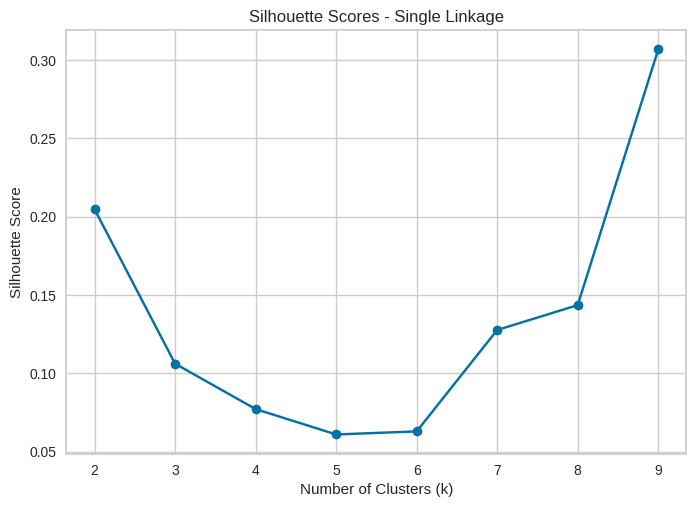

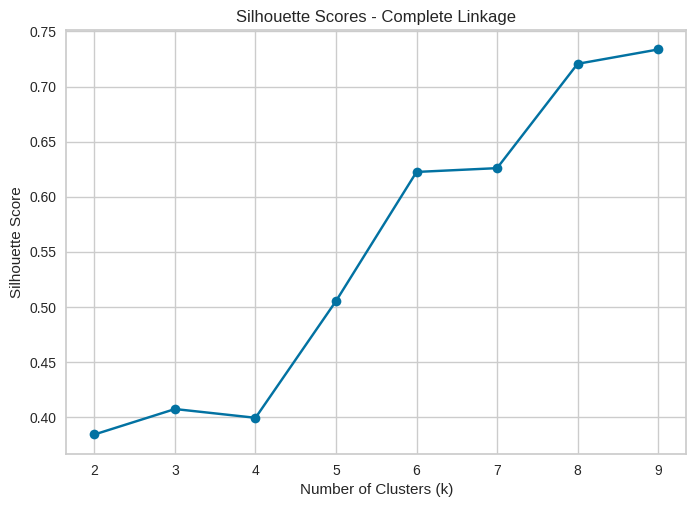

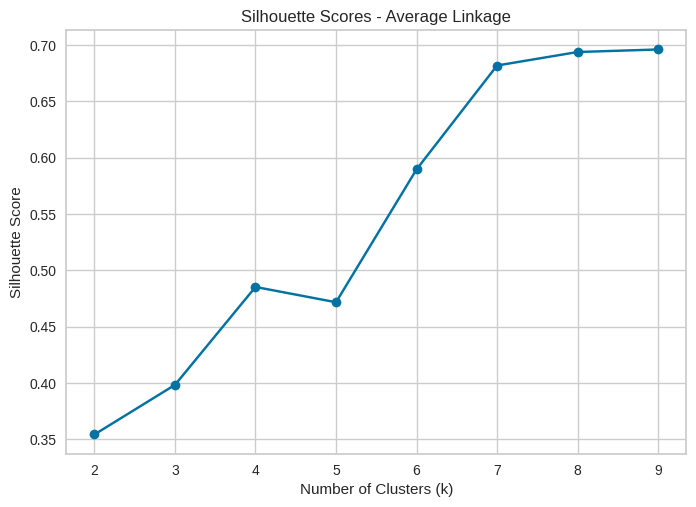

In [ ]:
for linkage_type in ['single', 'complete', 'average']:
    scores = []
    for k in range(2, 10):
        model = AgglomerativeClustering(n_clusters=k, linkage=linkage_type)
        labels = model.fit_predict(data_norm)
        scores.append(silhouette_score(data_norm, labels))
    plt.plot(range(2, 10), scores, marker='o')
    plt.title(f"Silhouette Scores - {linkage_type.capitalize()} Linkage")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.grid(True)
    plt.show()


In [ ]:
agnes_single = AgglomerativeClustering(n_clusters=9, linkage='single')
df_min = df_sub.copy()
df_min['cluster'] = agnes_single.fit_predict(data_norm)

agnes_avg = AgglomerativeClustering(n_clusters=9, linkage='average')
df_avg = df_sub.copy()
df_avg['cluster'] = agnes_avg.fit_predict(data_norm)

agnes_max = AgglomerativeClustering(n_clusters=9, linkage='complete')
df_max = df_sub.copy()
df_max['cluster'] = agnes_max.fit_predict(data_norm)


<ipython-input-115-e9fd25f139eb>:3: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



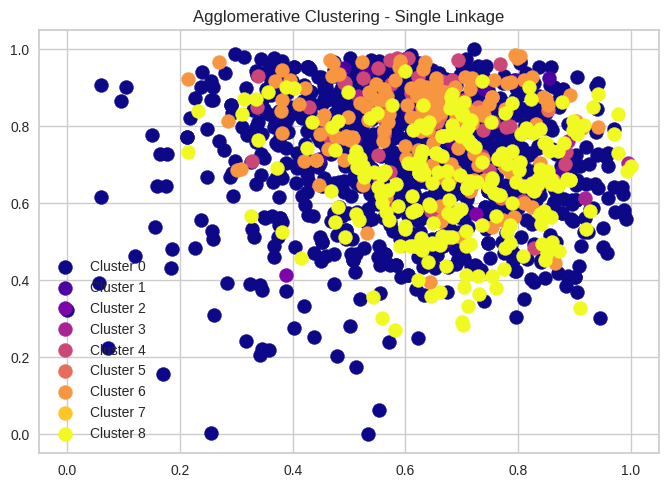

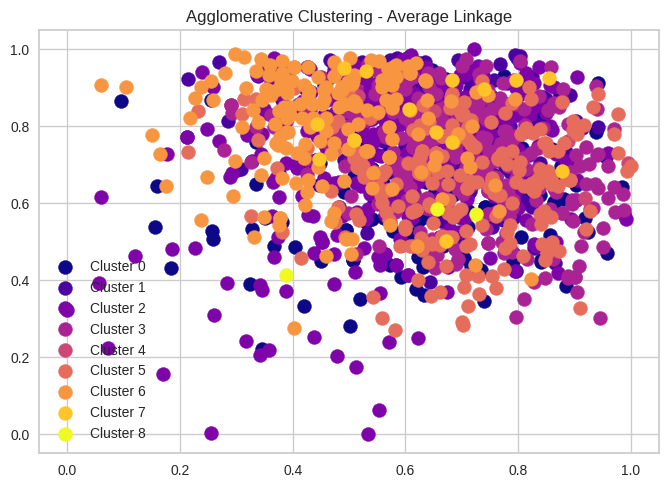

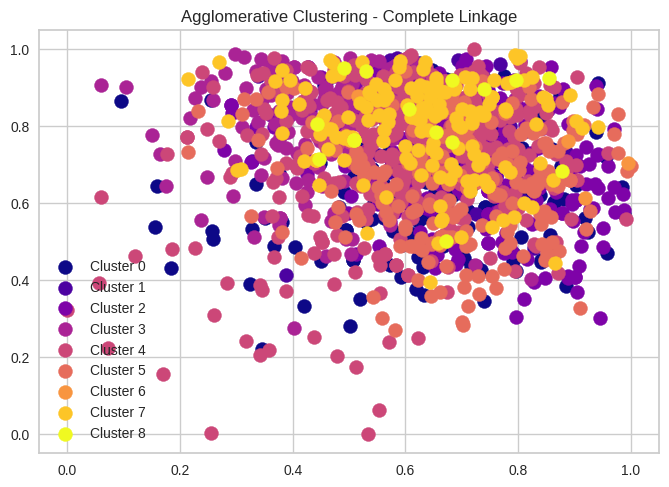

In [ ]:
def plot_clusters(df_result, title):
    unique_clusters = np.unique(df_result['cluster'])
    colors = plt.cm.get_cmap('plasma', len(unique_clusters))
    for cluster_id in unique_clusters:
        plt.scatter(data_norm[df_result['cluster'] == cluster_id, 0],
                    data_norm[df_result['cluster'] == cluster_id, 1],
                    s=100, c=[colors(cluster_id)], label=f'Cluster {cluster_id}')
    plt.legend()
    plt.title(title)
    plt.show()

plot_clusters(df_min, "Agglomerative Clustering - Single Linkage")
plot_clusters(df_avg, "Agglomerative Clustering - Average Linkage")
plot_clusters(df_max, "Agglomerative Clustering - Complete Linkage")


In [ ]:
print(f"Silhouette (Single): {silhouette_score(data_norm, df_min['cluster']):.3f}")
print(f"Silhouette (Average): {silhouette_score(data_norm, df_avg['cluster']):.3f}")
print(f"Silhouette (Complete): {silhouette_score(data_norm, df_max['cluster']):.3f}")


Silhouette (Single): 0.307
Silhouette (Average): 0.696
Silhouette (Complete): 0.734


In [ ]:
def generate_cluster_profile_agnes(data_norm, k, df_original, metrics_select, linkage_used):
    model = AgglomerativeClustering(n_clusters=k, metric=metrics_select, linkage=linkage_used)
    df_sub = df_original.copy()
    df_sub['cluster'] = model.fit_predict(data_norm)
    df_sub['cluster_result'] = 'Cluster ' + df_sub['cluster'].astype(str)
    grouped = df_sub.drop(columns='cluster').groupby('cluster_result').mean()
    overall = grouped.mean().to_frame().T
    overall.index = ['Overall']
    count_pct = df_sub['cluster_result'].value_counts(normalize=True).mul(100).to_frame('Percentage')
    count = df_sub['cluster_result'].value_counts().to_frame('Count')
    stats = grouped.join(count).join(count_pct)
    return stats.style.format({'Count': '{:.0f}', 'Percentage': '{:.2f}'}).background_gradient(cmap='Purples')

display(generate_cluster_profile_agnes(data_norm, 9, df_sub, 'euclidean', 'single'))
display(generate_cluster_profile_agnes(data_norm, 9, df_sub, 'euclidean', 'average'))
display(generate_cluster_profile_agnes(data_norm, 9, df_sub, 'euclidean', 'complete'))


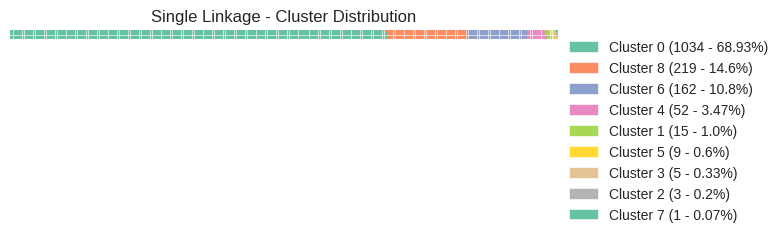

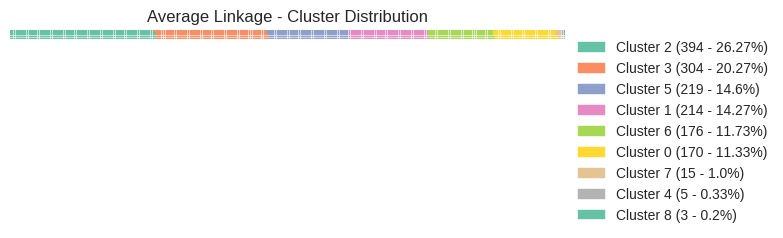

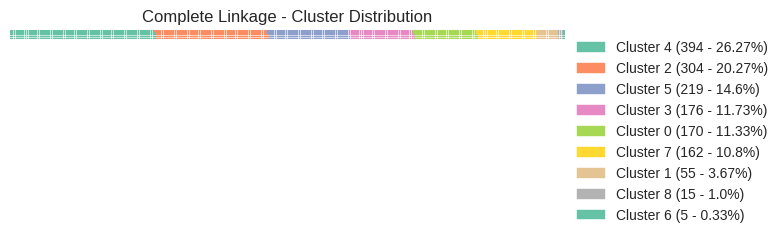

In [ ]:
for label, df_plot in zip(
    ['Single Linkage', 'Average Linkage', 'Complete Linkage'],
    [df_min, df_avg, df_max]
):
    cluster_counts = df_plot['cluster'].value_counts()
    total = cluster_counts.sum()
    fig = plt.figure(
        FigureClass=Waffle,
        rows=5,
        values=cluster_counts,
        title={'label': f'{label} - Cluster Distribution', 'loc': 'center'},
        labels=[f"Cluster {i} ({count} - {round((count / total) * 100, 2)}%)"
                for i, count in cluster_counts.items()],
        legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1.2)},
        figsize=(8, 5)
    )
    plt.show()


##DBSCAN - Clustering 3

In [ ]:
# Install necessary packages
!pip install pywaffle yellowbrick --quiet

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from pywaffle import Waffle


In [ ]:
# Select relevant features including genre
df_sub = df[['danceability', 'energy', 'rnb', 'hiphop', 'rock', 'dance']]

# Normalize features
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(df_sub)

In [ ]:
def calculate_dbscan_metrics(data_norm, eps, min_samples):
    model = DBSCAN(eps=eps, min_samples=min_samples)
    labels = model.fit_predict(data_norm)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    outlier_ratio = np.sum(labels == -1) / len(labels)

    sse = 0
    cluster_centers = {}
    for label in set(labels):
        if label == -1: continue
        cluster_points = data_norm[labels == label]
        center = np.mean(cluster_points, axis=0)
        cluster_centers[label] = center
        sse += np.sum(np.linalg.norm(cluster_points - center, axis=1) ** 2)

    overall_mean = np.mean(data_norm, axis=0)
    ssb = sum(np.sum(labels == label) * np.sum((center - overall_mean) ** 2) for label, center in cluster_centers.items())
    silhouette_avg = silhouette_score(data_norm[labels != -1], labels[labels != -1]) if n_clusters > 1 else np.nan

    return pd.DataFrame([{
        'eps': eps,
        'min_samples': min_samples,
        'n_clusters': n_clusters,
        'outlier_ratio': outlier_ratio,
        'SSE': sse,
        'SSB': ssb,
        'SSE + SSB': sse + ssb,
        'Silhouette Score': silhouette_avg
    }])


In [ ]:
eps_values = np.arange(0.1, 1.0, 0.1)
min_samples_values = range(3, 10)

results = []
for eps in eps_values:
    for min_samples in min_samples_values:
        results.append(calculate_dbscan_metrics(data_norm, eps, min_samples))

results_df = pd.concat(results, ignore_index=True)


In [ ]:
print("🔎 Sorted by Silhouette Score:")
display(results_df.sort_values(by='Silhouette Score', ascending=False))

print("🔎 Sorted by SSE + SSB:")
display(results_df.sort_values(by='SSE + SSB'))


🔎 Sorted by Silhouette Score:


eps  min_samples  n_clusters  outlier_ratio      SSE        SSB  \
6   0.1            9           7         0.0807  50.5212   915.8582   
5   0.1            8           7         0.0787  50.9241   917.9957   
3   0.1            6           8         0.0580  53.9722   947.9620   
2   0.1            5           8         0.0540  54.7866   952.7706   
12  0.2            8           9         0.0100  66.3565  1014.4639   
..  ...          ...         ...            ...      ...        ...   
28  0.5            3          11         0.0007  68.8757  1031.5767   
56  0.9            3          11         0.0007  68.8757  1031.5767   
4   0.1            7           8         0.0673  52.6772   932.7120   
0   0.1            3          12         0.0293  58.9923   989.1458   
1   0.1            4          11         0.0400  56.0233   972.6326   

    SSE + SSB  Silhouette Score  
6    966.3793            0.7675  
5    968.9199            0.7669  
3   1001.9342            0.7629  
2   1007.5572            0.7618  
12  1080.8204            0.7481  
..        ...               ...  
28  1100.4523            0.7455  
56  1100.4523            0.7455  
4    985.3892            0.7176  
0   1048.1380            0.6933  
1   1028.6559            0.6862  

[63 rows x 8 columns]

🔎 Sorted by SSE + SSB:


eps  min_samples  n_clusters  outlier_ratio      SSE        SSB  \
6   0.1            9           7         0.0807  50.5212   915.8582   
5   0.1            8           7         0.0787  50.9241   917.9957   
4   0.1            7           8         0.0673  52.6772   932.7120   
3   0.1            6           8         0.0580  53.9722   947.9620   
2   0.1            5           8         0.0540  54.7866   952.7706   
..  ...          ...         ...            ...      ...        ...   
28  0.5            3          11         0.0007  68.8757  1031.5767   
35  0.6            3          11         0.0007  68.8757  1031.5767   
42  0.7            3          11         0.0007  68.8757  1031.5767   
49  0.8            3          11         0.0007  68.8757  1031.5767   
56  0.9            3          11         0.0007  68.8757  1031.5767   

    SSE + SSB  Silhouette Score  
6    966.3793            0.7675  
5    968.9199            0.7669  
4    985.3892            0.7176  
3   1001.9342            0.7629  
2   1007.5572            0.7618  
..        ...               ...  
28  1100.4523            0.7455  
35  1100.4523            0.7455  
42  1100.4523            0.7455  
49  1100.4523            0.7455  
56  1100.4523            0.7455  

[63 rows x 8 columns]

In [ ]:
def generate_cluster_profile_dbscan(data_norm, eps, min_samples, df_original):
    model = DBSCAN(eps=eps, min_samples=min_samples)
    df_sub = df_original.copy()
    df_sub['cluster'] = model.fit_predict(data_norm)
    df_sub['cluster_result'] = 'Cluster ' + df_sub['cluster'].astype(str)

    df_mean = df_sub.drop(columns='cluster').groupby('cluster_result').mean()
    overall_mean = df_mean.mean().to_frame().T
    overall_mean.index = ['Overall']

    counts = df_sub['cluster_result'].value_counts()
    count_pct = (counts / counts.sum() * 100).to_frame('Percentage')
    count = counts.to_frame('Count')

    profile = df_mean.join(count).join(count_pct)
    profile.index = profile.index.str.replace('Cluster -1', 'Outliers')

    return profile.style.format({"Count": "{:.0f}", **{col: "{:.2f}" for col in profile.columns if col != 'Count'}}).background_gradient(cmap='Purples')


In [ ]:
# Try best eps and min_samples combinations
display(generate_cluster_profile_dbscan(data_norm, 0.1, 9, df_sub))
print()
display(generate_cluster_profile_dbscan(data_norm, 0.1, 8, df_sub))


##Q3b

In [ ]:
from sklearn.cluster import KMeans

# Reuse the subset with relevant features for clustering
cluster_features = ['danceability', 'energy', "rock","dance","rnb","hiphop"]
df_cluster = df[cluster_features].copy()

# Normalize
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(df_cluster)

# Apply KMeans with k=6
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=1)
df['cluster_kmeans'] = kmeans.fit_predict(data_norm)


In [ ]:
df['popular_bin'] = df['popularity'].apply(lambda x: 1 if x >= 65 else 0)


In [ ]:
import statsmodels.api as sm
from IPython.display import display

cluster_results = []

for cluster_id in sorted(df['cluster_kmeans'].unique()):
    cluster_df = df[df['cluster_kmeans'] == cluster_id]

    X = cluster_df[['valence']]
    X = sm.add_constant(X)  # Adds intercept
    y = cluster_df['popular_bin']

    model = sm.Logit(y, X)
    result = model.fit(disp=False)

    summary = {
        'Cluster': f'Cluster {cluster_id}',
        'Coefficient (valence)': result.params['valence'],
        'P-value': result.pvalues['valence'],
        'LLR p-value (Model)': result.llr_pvalue,
        'Pseudo R²': result.prsquared
    }
    cluster_results.append(summary)

# Convert to DataFrame
import pandas as pd
valence_model_df = pd.DataFrame(cluster_results)
display(valence_model_df)


Cluster  Coefficient (valence)  P-value  LLR p-value (Model)   Pseudo R²
0  Cluster 0                 0.7405   0.1844               0.1830  4.2201e-03
1  Cluster 1                -0.1590   0.7140               0.7139  2.4606e-04
2  Cluster 2                -0.7873   0.2314               0.2300  4.7437e-03
3  Cluster 3                -0.5724   0.4223               0.4217  2.8086e-03
4  Cluster 4                -0.0381   0.9555               0.9555  1.2390e-05
5  Cluster 5                 0.5611   0.3789               0.3773  2.7880e-03

In [ ]:
from sklearn.cluster import AgglomerativeClustering

df['cluster_agnes'] = AgglomerativeClustering(n_clusters=9, linkage='average').fit_predict(MinMaxScaler().fit_transform(df[['danceability', 'energy', 'rnb', 'hiphop', 'rock', 'dance']]))


In [ ]:
from sklearn.cluster import DBSCAN

df['cluster_dbscan'] = DBSCAN(eps=0.1, min_samples=9).fit_predict(MinMaxScaler().fit_transform(df[['danceability', 'energy', 'rnb', 'hiphop', 'rock', 'dance']]))


In [ ]:
import statsmodels.api as sm

def run_valence_model_per_cluster(df, cluster_col):
    summaries = []
    for cluster_id in sorted(df[cluster_col].dropna().unique()):
        if cluster_id == -1:  # Skip DBSCAN outliers
            continue
        subset = df[df[cluster_col] == cluster_id]
        X = sm.add_constant(subset[['valence']])
        y = subset['popular_bin']
        model = sm.Logit(y, X)
        result = model.fit(disp=False)
        summaries.append({
            'Cluster': f'{cluster_col}_{cluster_id}',
            'Coef (valence)': result.params['valence'],
            'P-Value': result.pvalues['valence'],
            'LLR P-Value': result.llr_pvalue,
            'Pseudo R²': result.prsquared
        })
    return pd.DataFrame(summaries)


In [ ]:
results_kmeans = run_valence_model_per_cluster(df, 'cluster_kmeans')
results_agnes  = run_valence_model_per_cluster(df, 'cluster_agnes')
results_dbscan = run_valence_model_per_cluster(df, 'cluster_dbscan')

# Combine for comparison
valence_models_all = pd.concat([results_kmeans, results_agnes, results_dbscan], ignore_index=True)
display(valence_models_all)


/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning:

Perfect se

Cluster  Coef (valence)  P-Value  LLR P-Value   Pseudo R²
0   cluster_kmeans_0          0.7405   0.1844       0.1830  4.2201e-03
1   cluster_kmeans_1         -0.1590   0.7140       0.7139  2.4606e-04
2   cluster_kmeans_2         -0.7873   0.2314       0.2300  4.7437e-03
3   cluster_kmeans_3         -0.5724   0.4223       0.4217  2.8086e-03
4   cluster_kmeans_4         -0.0381   0.9555       0.9555  1.2390e-05
5   cluster_kmeans_5          0.5611   0.3789       0.3773  2.7880e-03
6    cluster_agnes_0         -0.4204   0.5635       0.5633  1.4978e-03
7    cluster_agnes_1          0.5611   0.3789       0.3773  2.7880e-03
8    cluster_agnes_2         -0.1590   0.7140       0.7139  2.4606e-04
9    cluster_agnes_3          0.7405   0.1844       0.1830  4.2201e-03
10   cluster_agnes_4        -40.4342   0.7040       0.0806  4.5370e-01
11   cluster_agnes_5         -0.7558   0.2518       0.2506  4.4036e-03
12   cluster_agnes_6          0.7052   0.3368       0.3350  4.1146e-03
13   cluster_agnes_7         -7.7564   0.0524       0.0155  3.0709e-01
14   cluster_agnes_8      -2742.5980   0.9996       0.0507  1.0000e+00
15  cluster_dbscan_0         -0.3350   0.4764       0.4761  9.8475e-04
16  cluster_dbscan_1          0.3497   0.6501       0.6499  9.9157e-04
17  cluster_dbscan_2         -0.7426   0.2806       0.2794  4.1447e-03
18  cluster_dbscan_3          0.5865   0.3020       0.3011  2.6303e-03
19  cluster_dbscan_4         -0.7231   0.3871       0.3862  3.8304e-03
20  cluster_dbscan_5          0.9015   0.2529       0.2486  7.0615e-03
21  cluster_dbscan_6         -0.6766   0.6832       0.6823  3.2069e-03

#Question 3 - Part 4

In [ ]:
!pip install mlxtend --quiet

import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import KBinsDiscretizer


In [ ]:
# Create binary target variable
df['popular_bin'] = df['popularity'].apply(lambda x: 1 if x >= 65 else 0)

In [ ]:
# Sort the dataframe by popularity in descending order
top_songs = df.sort_values(by='popularity', ascending=False)

# Select relevant columns for display (customize as needed)
top_10_songs = top_songs[['artist', 'song', 'popularity', 'year']].head(10)

# Display the top 10 songs
print(top_10_songs)

import plotly.express as px

# Sort and select top 10 songs
top_10_songs = df.sort_values(by='popularity', ascending=False).head(10)

# Create a column that combines artist and song title for cleaner labels
top_10_songs['title'] = top_10_songs['artist'] + ' – ' + top_10_songs['song']

# Create horizontal bar chart
fig = px.bar(top_10_songs,
             x='popularity',
             y='title',
             orientation='h',
             title='Top 10 Most Popular Songs on Spotify (1998–2020)',
             labels={'popularity': 'Popularity Score', 'title': 'Song'},
             height=500)

fig.update_layout(yaxis={'categoryorder': 'total ascending'})  # Highest at the top
fig.show()


                 artist                                      song  popularity  \
1322  The Neighbourhood                           Sweater Weather        89.0   
1311          Tom Odell                              Another Love        88.0   
201              Eminem                                Without Me        87.0   
6                Eminem                       The Real Slim Shady        86.0   
1304         Bruno Mars                      Locked out of Heaven        85.0   
209              Eminem                          'Till I Collapse        85.0   
1227         Bruno Mars                      Locked out of Heaven        85.0   
1344     Arctic Monkeys                          Do I Wanna Know?        84.0   
1326     Arctic Monkeys  Why'd You Only Call Me When You're High?        84.0   
1408        John Legend                                 All of Me        84.0   

        year  
1322  2013.0  
1311  2013.0  
201   2002.0  
6     2000.0  
1304  2012.0  
209   2002.0  
122

In [ ]:
# Select continuous and genre features
features = ['energy', 'danceability', 'valence', 'loudness', 'acousticness', 'speechiness', 'tempo',
            'rnb', 'rock', 'hiphop', 'dance', 'popular_bin']

df_assoc = df[features].copy()

# Binarize numerical columns using median cut
for col in ['energy', 'danceability', 'valence', 'loudness', 'acousticness', 'speechiness', 'tempo']:
    median = df_assoc[col].median()
    df_assoc[f'{col}_high'] = df_assoc[col] > median

# Drop raw numerical columns
df_assoc = df_assoc.drop(columns=['energy', 'danceability', 'valence', 'loudness', 'acousticness', 'speechiness', 'tempo'])

# Convert to 1/0 integers
df_assoc = df_assoc.astype(int)

# Preview
df_assoc.head()


rnb  rock  hiphop  dance  popular_bin  energy_high  danceability_high  \
0    0     0       0      0            1            1                  1   
1    0     1       0      0            1            1                  0   
2    0     0       0      0            1            0                  0   
3    0     1       0      0            1            1                  0   
4    0     0       0      0            1            1                  0   

   valence_high  loudness_high  acousticness_high  speechiness_high  \
0             1              0                  1                 0   
1             1              1                  0                 0   
2             0              0                  1                 0   
3             0              1                  0                 0   
4             1              1                  0                 0   

   tempo_high  
0           0  
1           1  
2           1  
3           0  
4           1

In [ ]:
# Convert dataframe to boolean
df_bool = df_assoc.astype(bool)

# Generate frequent itemsets
frequent_items = apriori(df_bool, min_support=0.05, use_colnames=True)

# Generate rules
rules = association_rules(frequent_items, metric="lift", min_threshold=1.2)

# Sort and filter rules that predict popularity
rules_sorted = rules.sort_values(by='lift', ascending=False)
rules_popular = rules_sorted[rules_sorted['consequents'].astype(str).str.contains('popular_bin')]

# Show top rules
rules_popular[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(15)


antecedents  \
1183              (speechiness_high, loudness_high)   
1189                          (energy_high, hiphop)   
1188                        (hiphop, loudness_high)   
1519                  (valence_high, loudness_high)   
1239                    (hiphop, acousticness_high)   
1212                         (hiphop, valence_high)   
1184                (speechiness_high, energy_high)   
1518               (energy_high, danceability_high)   
1242                                       (hiphop)   
1181           (energy_high, hiphop, loudness_high)   
104                                          (rock)   
502                                        (hiphop)   
1553      (tempo_high, valence_high, loudness_high)   
1575  (tempo_high, speechiness_high, loudness_high)   
546                         (hiphop, loudness_high)   

                                            consequents  support  confidence  \
1183                 (energy_high, hiphop, popular_bin)   0.0540      0.2126   
1189     (speechiness_high, popular_bin, loudness_high)   0.0540      0.3266   
1188       (speechiness_high, energy_high, popular_bin)   0.0540      0.2914   
1519      (energy_high, popular_bin, danceability_high)   0.0600      0.2200   
1239  (speechiness_high, popular_bin, danceability_h...   0.0560      0.2633   
1212  (speechiness_high, popular_bin, danceability_h...   0.0540      0.2563   
1184               (hiphop, popular_bin, loudness_high)   0.0540      0.2072   
1518         (valence_high, popular_bin, loudness_high)   0.0600      0.2752   
1242  (speechiness_high, acousticness_high, popular_...   0.0560      0.1453   
1181                    (speechiness_high, popular_bin)   0.0540      0.4500   
104                          (energy_high, popular_bin)   0.0613      0.4577   
502   (speechiness_high, popular_bin, danceability_h...   0.0927      0.2405   
1553                         (energy_high, popular_bin)   0.0607      0.4505   
1575                         (energy_high, popular_bin)   0.0587      0.4467   
546                     (speechiness_high, popular_bin)   0.0800      0.4317   

        lift  
1183  2.4343  
1189  2.4253  
1188  2.3624  
1519  2.2764  
1239  2.0680  
1212  2.0131  
1184  1.9667  
1518  1.9382  
1242  1.9291  
1181  1.9286  
104   1.8966  
502   1.8886  
1553  1.8667  
1575  1.8510  
546   1.8499

In [ ]:
# Convert dataframe to boolean
df_bool = df_assoc.astype(bool)

# Generate frequent itemsets
frequent_items = apriori(df_bool, min_support=0.05, use_colnames=True)

# Generate rules
rules = association_rules(frequent_items, metric="lift", min_threshold=1.2)

# Sort and filter rules that predict popularity
rules_sorted = rules.sort_values(by='lift', ascending=False)
rules_popular = rules_sorted[rules_sorted['consequents'].astype(str).str.contains('popular_bin')]

# Show top rules
rules_popular[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(15)


antecedents  \
1183              (speechiness_high, loudness_high)   
1189                          (energy_high, hiphop)   
1188                        (hiphop, loudness_high)   
1519                  (valence_high, loudness_high)   
1239                    (hiphop, acousticness_high)   
1212                         (hiphop, valence_high)   
1184                (speechiness_high, energy_high)   
1518               (energy_high, danceability_high)   
1242                                       (hiphop)   
1181           (energy_high, hiphop, loudness_high)   
104                                          (rock)   
502                                        (hiphop)   
1553      (tempo_high, valence_high, loudness_high)   
1575  (tempo_high, speechiness_high, loudness_high)   
546                         (hiphop, loudness_high)   

                                            consequents  support  confidence  \
1183                 (energy_high, hiphop, popular_bin)   0.0540      0.2126   
1189     (speechiness_high, popular_bin, loudness_high)   0.0540      0.3266   
1188       (speechiness_high, energy_high, popular_bin)   0.0540      0.2914   
1519      (energy_high, popular_bin, danceability_high)   0.0600      0.2200   
1239  (speechiness_high, popular_bin, danceability_h...   0.0560      0.2633   
1212  (speechiness_high, popular_bin, danceability_h...   0.0540      0.2563   
1184               (hiphop, popular_bin, loudness_high)   0.0540      0.2072   
1518         (valence_high, popular_bin, loudness_high)   0.0600      0.2752   
1242  (speechiness_high, acousticness_high, popular_...   0.0560      0.1453   
1181                    (speechiness_high, popular_bin)   0.0540      0.4500   
104                          (energy_high, popular_bin)   0.0613      0.4577   
502   (speechiness_high, popular_bin, danceability_h...   0.0927      0.2405   
1553                         (energy_high, popular_bin)   0.0607      0.4505   
1575                         (energy_high, popular_bin)   0.0587      0.4467   
546                     (speechiness_high, popular_bin)   0.0800      0.4317   

        lift  
1183  2.4343  
1189  2.4253  
1188  2.3624  
1519  2.2764  
1239  2.0680  
1212  2.0131  
1184  1.9667  
1518  1.9382  
1242  1.9291  
1181  1.9286  
104   1.8966  
502   1.8886  
1553  1.8667  
1575  1.8510  
546   1.8499

In [ ]:
import plotly.express as px

df_rules_plot = rules_popular.copy()
df_rules_plot['antecedents'] = df_rules_plot['antecedents'].astype(str)
df_rules_plot['consequents'] = df_rules_plot['consequents'].astype(str)

fig = px.bar(df_rules_plot.head(15),  # Top 15 rules
             x='antecedents',
             y='lift',
             color='consequents',
             title='Top Association Rules by Lift',
             labels={'antecedents': 'Feature Combinations', 'lift': 'Lift Score'},
             height=500)
fig.show()
